In [59]:
import geopandas as gpd
import pandas as pd
import osgeo as osg
import numpy as np
import matplotlib.pyplot as plt
from osgeo import ogr
import os
import pyproj
import datetime
import cartopy.crs as ccrs
import scipy

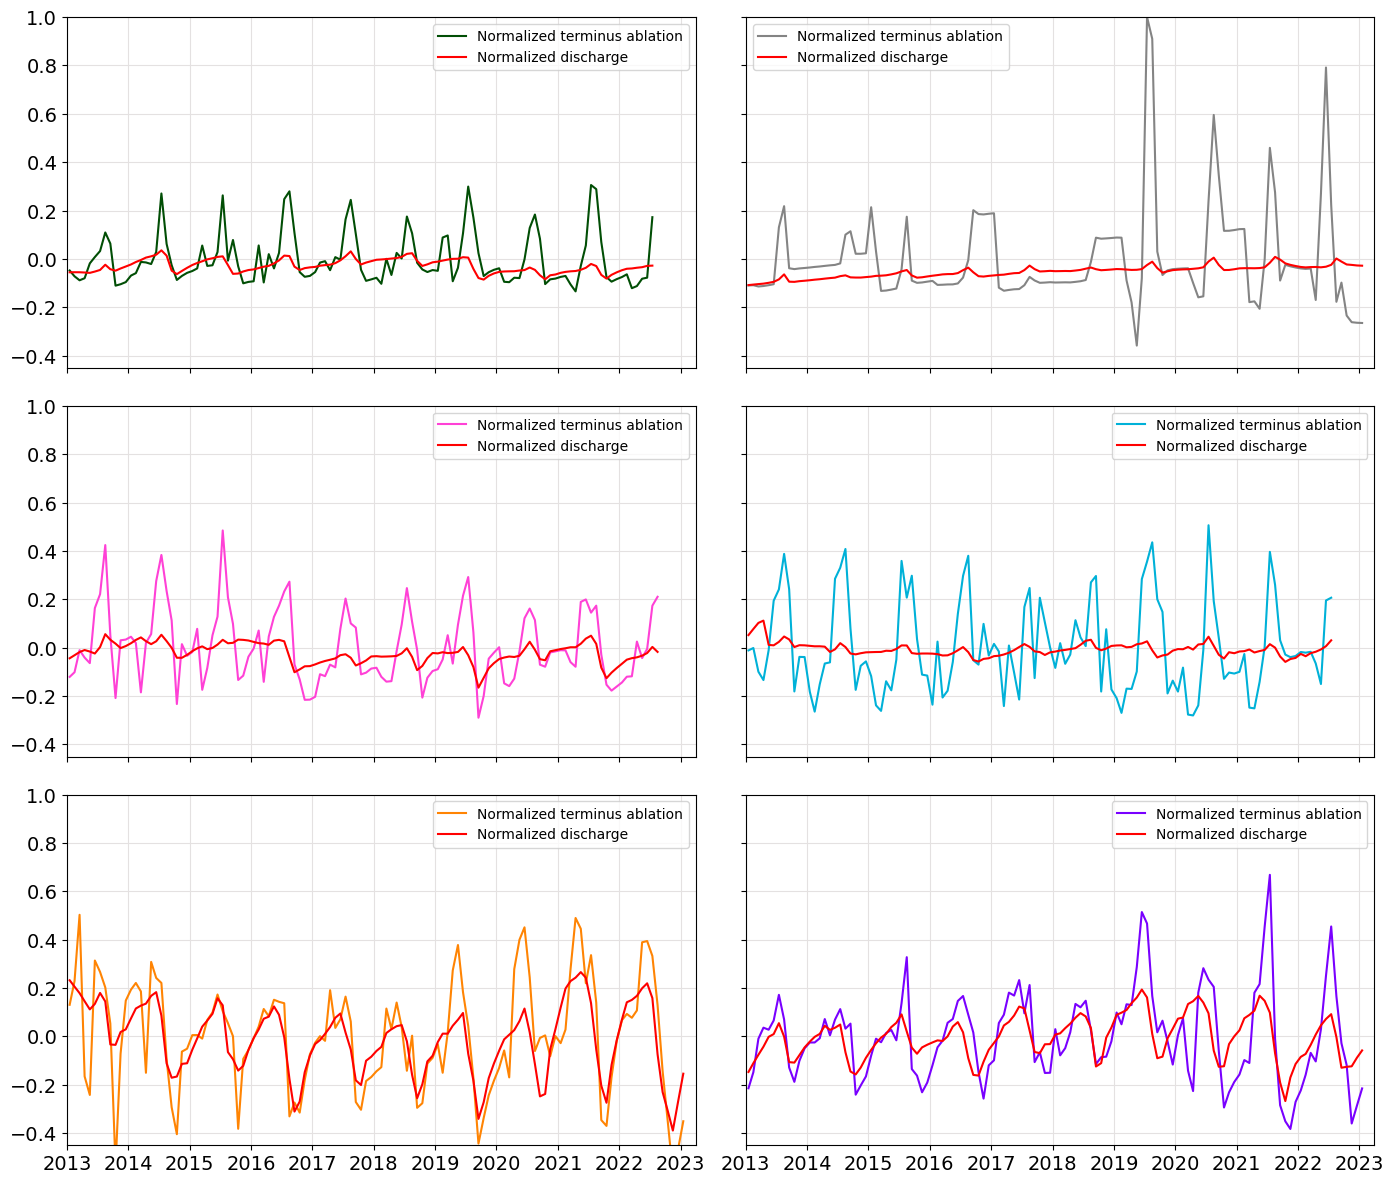

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

In [555]:

root_path = '/Users/amankc/Terminus_Ablation/';
regions_name = ['NW','NE','CW','CE','SE','SW']
fig,ax = plt.subplots(3,2,sharex='all', sharey='all',figsize=(14, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.tight_layout()
for region in regions_name:
    if region == 'CE':
        color_code1 = '#B7FCFF'; # This is the light color
        color_code2  = '#00B1D8';x=1;y=1;
    elif region == 'SE':
        color_code1 = '#E7D6FA'; # This is the light color
        color_code2  = '#7900FF';x=2;y=1;
    elif region == 'SW':
        color_code1 = '#F9DBBB'; # This is the light color
        color_code2  = '#FF8403';x=2;y=0;
    elif region == 'CW':
        color_code1 = '#FFB8BF'; # This is the light color
        color_code2  = '#ff41d6';x=1;y=0;
    elif region == 'NW':
        color_code1 = '#A1FC77'; # This is the light color
        color_code2  = '#014E05'; x=0;y=0;
    else:
        color_code1 = '#848484'; # This is the light color
        color_code2  = '#848484';x=0;y=1;
    
    import glob
    directory_path = root_path + 'Results/Output/Term_Ablation_Latest/'
    file_pattern = 'Term_Ablation_latest_updated_*' + region +'*.csv'  # Replace this with your desired file pattern
    
    # Use glob to find files matching the pattern in the directory
    matching_files = glob.glob(directory_path + file_pattern)
    
    csv_file = [];
    for file in matching_files:
        csv_file.append(pd.read_csv(file))
    
    term_ablation2 = [];
    discharge = [];
    date_axis = [];
    l = [];
    for i in range(len(csv_file)):
        l.append(len(csv_file[i]));
    len_max = np.min(l)
    min_idx = pd.Series(l).idxmin()
    #just to make the length of vectors equal   
    for date in csv_file[min_idx].dates:
        date_axis.append(date)
    for i in range(len(csv_file)):
        j = 0;
        term_ablation2.append([])# Initialize an empty list for each index in term_ablation2
        discharge.append([])
        for j in range(len_max):
        # range(len(csv_file[i].term_abl_year)):
            term_ablation2[i].append(csv_file[i].term_abl_year[j])
            discharge[i].append(csv_file[i].discharge[j])
            # date_axis[i].append(csv_file[i].dates[j]);
            # date_axis[i] = csv_file[i].dates[j]
            j+=1;
    mean_term_abl = [];
    mean_discharge = [];
    for i in range(len(term_ablation2[0])):
        counter = 0;
        sum_term_abl = 0;
        sum_discharge  = 0;
        for j in range(len(term_ablation2)):
            sum_term_abl = sum_term_abl + term_ablation2[j][i]
            sum_discharge = sum_discharge + discharge[j][i]
            counter += 1;
        mean_term_abl.append(sum_term_abl/counter);
        mean_discharge.append(sum_discharge/counter);
    
    # new step
    csvs_df = pd.DataFrame()
    for i, file in enumerate(matching_files):
        df = pd.read_csv(file)
        df['site_number'] = i
        csvs_df = pd.concat([csvs_df, df])
    csvs_df.reset_index(drop=True, inplace=True)
    # convert dates to pandas.datetime
    csvs_df['dates'] = pd.to_datetime(csvs_df['dates'])
    
    # grab unique dates
    unique_dates = csvs_df['dates'].drop_duplicates()
    discharge_mean = [csvs_df.loc[csvs_df['dates']==date]['discharge'].mean() for date in unique_dates]
    term_ablation_mean = [csvs_df.loc[csvs_df['dates']==date]['term_abl_year'].mean() for date in unique_dates]
    
    #new step
    # Normailze the figure
    term_ablation2_normalized = [];
    discharge_normalized = [];
    for i in range(len(csv_file)):
        j = 0;
        term_ablation2_normalized.append([]) # Initialize an empty list for each index in term_ablation2
        discharge_normalized.append([]);
        mean_value = np.mean(csv_file[i].term_abl_year)
        max_value = np.max(csv_file[i].term_abl_year-mean_value)
    
        mean_value_dis = np.mean(csv_file[i].discharge)
        max_value_dis = np.max(csv_file[i].discharge-mean_value_dis)
        for j in range(len_max):
        # range(len(csv_file[i].term_abl_year)):
            term_ablation2_normalized[i].append((csv_file[i].term_abl_year[j]-mean_value)/max_value)
            discharge_normalized[i].append((csv_file[i].discharge[j]-mean_value_dis)/max_value_dis)
            # date_axis[i].append(csv_file[i].dates[j]);
            # date_axis[i] = csv_file[i].dates[j]
            j+=1;
    
    mean_term_abl_normalized = [];
    mean_discharge_normalized = [];
    for i in range(len(term_ablation2_normalized[0])):
        counter = 0;
        sum_term_abl = 0; discharge_sum = 0;
        for j in range(len(term_ablation2)):
            sum_term_abl = sum_term_abl + term_ablation2_normalized[j][i]
            discharge_sum = discharge_sum +  discharge_normalized[j][i]
            counter += 1;
        mean_term_abl_normalized.append(sum_term_abl/counter);
        mean_discharge_normalized.append(discharge_sum/counter);
    columns = {'date': date_axis,'normalized_term_abl': mean_term_abl_normalized,'normalized_discharge':mean_discharge_normalized}
    mean_df = pd.DataFrame(data=columns)
    mean_df.to_csv(root_path + 'Results/Output/Normalized_Terminus_Ablation/'+'Normalized_Time_series_for_' + region + '.csv')
    
    
    date_array = np.array(date_axis)
    mean_ta_array = np.array(mean_term_abl_normalized)
    term_abl_df = pd.DataFrame({'date': date_array,'mean_ta_normalized': mean_ta_array})
    # for i in range(len(term_ablation2_normalized)):
    #     term_abl_array[i] = np.array(term_ablation2_normalized[0])
    plt.figure(figsize=(14,8)) 
    term_abl_df['date'] = pd.to_datetime(term_abl_df['date'])
    date_array = np.array(date_axis)
    mean_dis_array = np.array(mean_discharge_normalized)
    dis_df = pd.DataFrame({'date': date_array,'mean_dis_normalized': mean_discharge_normalized})
    
    # Normailze the figure
    term_ablation2_normalized = [];
    discharge2_normalized = [];
    for i in range(len(csv_file)):
        j = 0;
        term_ablation2_normalized.append([]) # Initialize an empty list for each index in term_ablation2
        discharge2_normalized.append([]);
        mean_value = np.mean(csv_file[i].term_abl_year)
        max_value = np.max(csv_file[i].term_abl_year-mean_value)
    
        mean_value_dis = np.mean(csv_file[i].discharge)
        max_value_dis = np.max(csv_file[i].discharge-mean_value_dis)
        for j in range(len_max):
        # range(len(csv_file[i].term_abl_year)):
            term_ablation2_normalized[i].append((csv_file[i].term_abl_year[j]-mean_value)/max_value)
            discharge2_normalized[i].append((csv_file[i].discharge[j]-mean_value)/max_value)
            # date_axis[i].append(csv_file[i].dates[j]);
            # date_axis[i] = csv_file[i].dates[j]
            j+=1;
    
    mean_term_abl_normalized = [];
    mean_discharge_normalized2 = [];
    for i in range(len(term_ablation2_normalized[0])):
        counter = 0;
        sum_term_abl = 0; discharge_sum = 0;
        for j in range(len(term_ablation2)):
            sum_term_abl = sum_term_abl + term_ablation2_normalized[j][i]
            discharge_sum = discharge_sum +  discharge2_normalized[j][i]
            counter += 1;
        mean_term_abl_normalized.append(sum_term_abl/counter);
        mean_discharge_normalized2.append(discharge_sum/counter);
    term_abl_color = color_code2
    discharge_color = '#ff0000ff'
    ax[x][y].plot(term_abl_df['date'],mean_term_abl_normalized, color = term_abl_color)
    ax[x][y].plot(term_abl_df['date'],mean_discharge_normalized2, color = discharge_color)
    ax[x][y].set_xlim(np.datetime64('2013-01-01'), np.datetime64('2023-03-31'))
    ax[x][y].set_ylim(-0.45,1)
    ax[x][y].grid('on',color = '#E4E1E1')
    ax[x][y].legend(['Normalized terminus ablation','Normalized discharge'],loc = 'best')
# ax2 = plt.gca()
for row in ax:
    for subplot in row:
        # Set parameters for each subplot
        subplot.tick_params(labelsize=14)

fig.savefig(root_path + 'Results/Images/Regional_Figures/'+'Normalized_discharge_term-ablation_updated'+'.png',dpi=300)
plt.show()

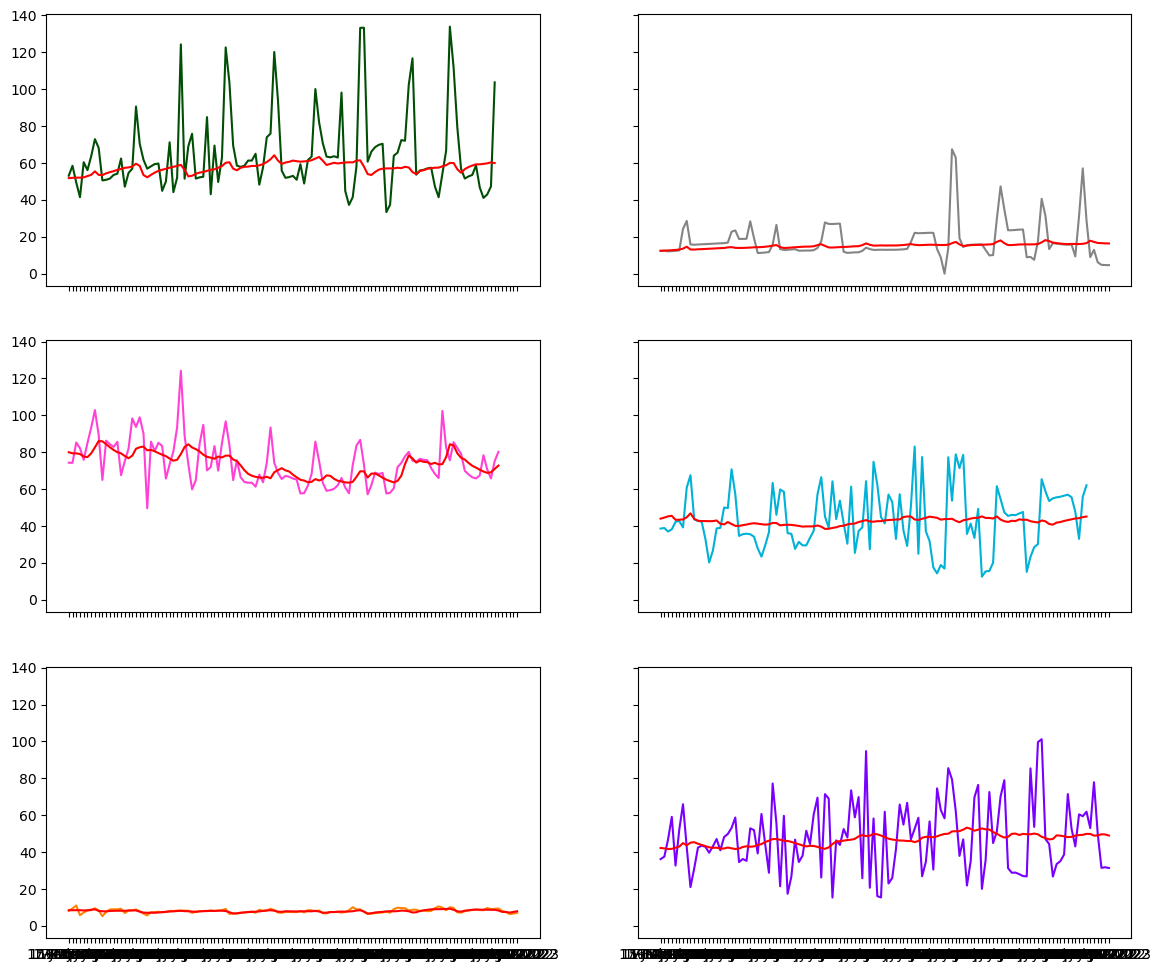

In [129]:
fig,ax = plt.subplots(3,2,sharex='all', sharey='all',figsize=(14, 12))
for region in regions_name:
    if region == 'CE':
        color_code1 = '#B7FCFF'; # This is the light color
        color_code2  = '#00B1D8';x=1;y=1;
    elif region == 'SE':
        color_code1 = '#E7D6FA'; # This is the light color
        color_code2  = '#7900FF';x=2;y=1;
    elif region == 'SW':
        color_code1 = '#F9DBBB'; # This is the light color
        color_code2  = '#FF8403';x=2;y=0;
    elif region == 'CW':
        color_code1 = '#FFB8BF'; # This is the light color
        color_code2  = '#ff41d6';x=1;y=0;
    elif region == 'NW':
        color_code1 = '#A1FC77'; # This is the light color
        color_code2  = '#014E05'; x=0;y=0;
    else:
        color_code1 = '#848484'; # This is the light color
        color_code2  = '#848484';x=0;y=1;

    directory_path = root_path + 'Results/Output/Term_Ablation_Latest/'
    file_pattern = 'Term_Ablation_latest_updated_*' + region +'*.csv'  # Replace this with your desired file pattern
    
    # Use glob to find files matching the pattern in the directory
    matching_files = glob.glob(directory_path + file_pattern)
    csv_file = [];
    for file in matching_files:
        csv_file.append(pd.read_csv(file))
    
    term_ablation2 = [];
    discharge = [];
    date_axis = [];
    l = [];
    for i in range(len(csv_file)):
        l.append(len(csv_file[i]));
    len_max = np.min(l)
    min_idx = pd.Series(l).idxmin()
    #just to make the length of vectors equal   
    for date in csv_file[min_idx].dates:
        date_axis.append(date)

    term_ablation2_normalized = [];
    discharge2_normalized = [];
    for i in range(len(csv_file)):
        j = 0;
        term_ablation2_normalized.append([]) # Initialize an empty list for each index in term_ablation2
        discharge2_normalized.append([]);
        # mean_value = np.mean(csv_file[i].term_abl_year)
        # max_value = np.max(csv_file[i].term_abl_year-mean_value)
    
        # mean_value_dis = np.mean(csv_file[i].discharge)
        # max_value_dis = np.max(csv_file[i].discharge-mean_value_dis)
        for j in range(len_max):
        # range(len(csv_file[i].term_abl_year)):
            term_ablation2_normalized[i].append(csv_file[i].term_abl_year[j])
            discharge2_normalized[i].append(csv_file[i].discharge[j])
            # date_axis[i].append(csv_file[i].dates[j]);
            # date_axis[i] = csv_file[i].dates[j]
            j+=1;

    mean_term_abl_normalized = [];
    mean_discharge_normalized2 = [];
    for i in range(len(term_ablation2_normalized[0])):
        sum_term_abl = 0; discharge_sum = 0;
        for j in range(len(term_ablation2_normalized)):
            sum_term_abl = sum_term_abl + term_ablation2_normalized[j][i]
            discharge_sum = discharge_sum +  discharge2_normalized[j][i]

        mean_term_abl_normalized.append(sum_term_abl);
        mean_discharge_normalized2.append(discharge_sum);
        
    date_array = np.array(date_axis)
    mean_ta_array = np.array(mean_term_abl_normalized);
    mean_df = pd.DataFrame({'date': date_array,'mean_ta_normalized': mean_ta_array})
    # plt.savefig(root_path + 'Results/Images/Regional_Figures/'+'Normalized_Time_series_for ' + region +'.png',dpi=300,bbox_inches='tight', pad_inches=0)
    # columns = {'date': date_array,'normalized_term_abl': mean_term_abl_normalized,'normalized_discharge':mean_discharge_normalized2}
    # mean_df = pd.DataFrame(data=columns)
    # mean_df.to_csv(root_path + 'Results/Output/Normalized_Terminus_Ablation/'+'Normalized_Time_series_for_' + region + '.csv')
    
    term_abl_color = color_code2
    discharge_color = '#ff0000ff'
    ax[x][y].plot(mean_df['date'],mean_term_abl_normalized, color = term_abl_color)
    ax[x][y].plot(mean_df['date'],mean_discharge_normalized2, color = discharge_color)
    # ax[x][y].set_xlim(np.datetime64('2013-01-01'), np.datetime64('2023-03-31'))
    # ax[x][y].set_ylim(-0.45,1)
    # ax[x][y].grid('on',color = '#E4E1E1')
    # plt.xlabel('Years',fontsize = 14)
    # plt.ylabel('Normalized flux',fontsize = 14)
    # plt.legend(['Normalized terminus ablation','Normalized discharge'],loc = 'best')
    # plt.tight_layout()

plt.show()
    # plt.savefig(root_path + 'Results/Images/Regional_Figures/'+'Ice_flux_ ' + region +'.png',dpi=300)

In [114]:
# term_ablation2_normalized

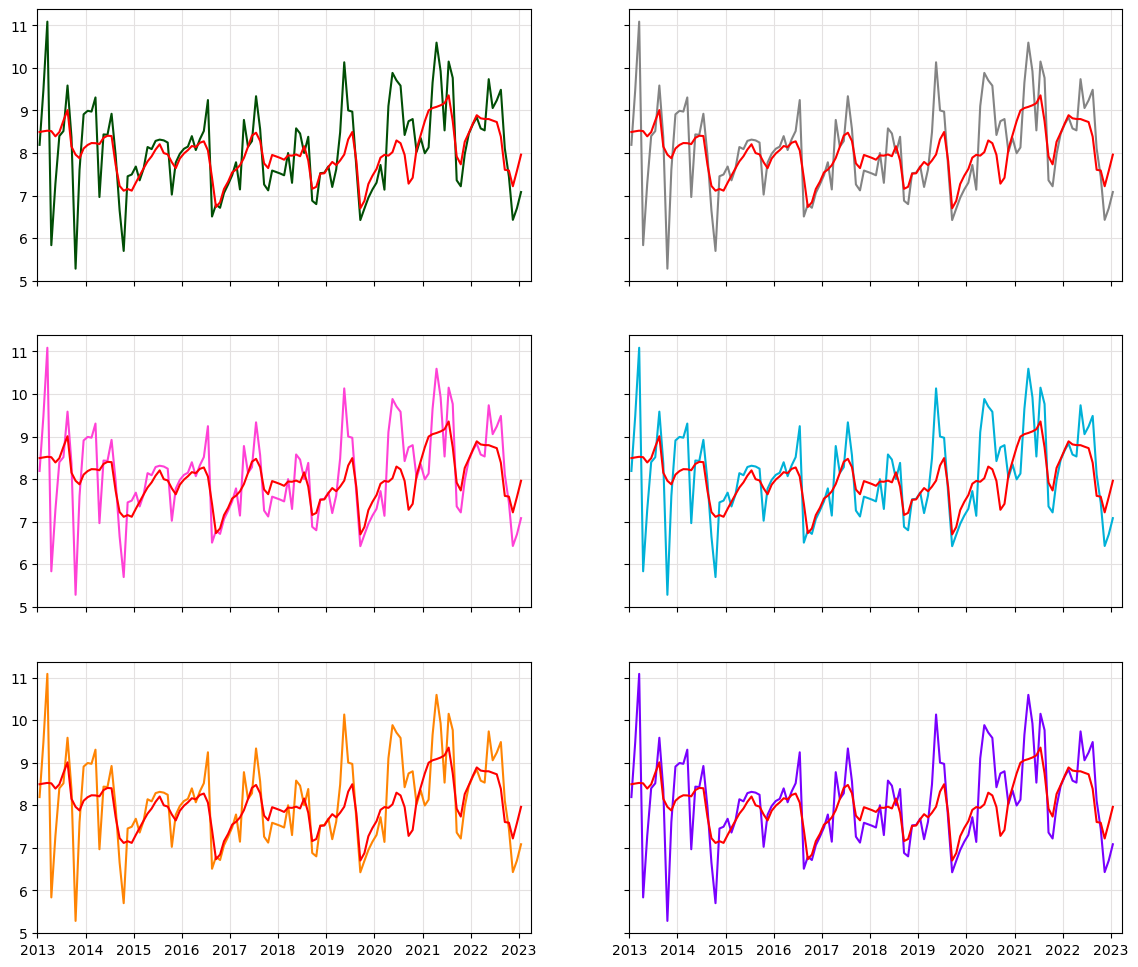

In [118]:
fig,ax = plt.subplots(3,2,sharex='all', sharey='all',figsize=(14, 12))
for region in regions_name:
    if region == 'CE':
        color_code1 = '#B7FCFF'; # This is the light color
        color_code2  = '#00B1D8';x=1;y=1;
    elif region == 'SE':
        color_code1 = '#E7D6FA'; # This is the light color
        color_code2  = '#7900FF';x=2;y=1;
    elif region == 'SW':
        color_code1 = '#F9DBBB'; # This is the light color
        color_code2  = '#FF8403';x=2;y=0;
    elif region == 'CW':
        color_code1 = '#FFB8BF'; # This is the light color
        color_code2  = '#ff41d6';x=1;y=0;
    elif region == 'NW':
        color_code1 = '#A1FC77'; # This is the light color
        color_code2  = '#014E05'; x=0;y=0;
    else:
        color_code1 = '#848484'; # This is the light color
        color_code2  = '#848484';x=0;y=1;

    csv_file = [];
    for file in matching_files:
        csv_file.append(pd.read_csv(file))
        
    term_ablation2_normalized = [];
    discharge2_normalized = [];
    for i in range(len(csv_file)):
        j = 0;
        term_ablation2_normalized.append([]) # Initialize an empty list for each index in term_ablation2
        discharge2_normalized.append([]);
        mean_value = np.mean(csv_file[i].term_abl_year)
        max_value = np.max(csv_file[i].term_abl_year-mean_value)
    
        mean_value_dis = np.mean(csv_file[i].discharge)
        max_value_dis = np.max(csv_file[i].discharge-mean_value_dis)
        for j in range(len_max):
        # range(len(csv_file[i].term_abl_year)):
            term_ablation2_normalized[i].append(csv_file[i].term_abl_year[j])
            discharge2_normalized[i].append(csv_file[i].discharge[j])
            # date_axis[i].append(csv_file[i].dates[j]);
            # date_axis[i] = csv_file[i].dates[j]
            j+=1;
    
    mean_term_abl_normalized = [];
    mean_discharge_normalized2 = [];
    for i in range(len(term_ablation2_normalized[0])):
        counter = 0;
        sum_term_abl = 0; discharge_sum = 0;
        for j in range(len(term_ablation2)):
            sum_term_abl = sum_term_abl + term_ablation2_normalized[j][i]
            discharge_sum = discharge_sum +  discharge2_normalized[j][i]
            counter += 1;
        mean_term_abl_normalized.append(sum_term_abl);
        mean_discharge_normalized2.append(discharge_sum);
    
    # plt.savefig(root_path + 'Results/Images/Regional_Figures/'+'Normalized_Time_series_for ' + region +'.png',dpi=300,bbox_inches='tight', pad_inches=0)
    columns = {'date': date_axis,'normalized_term_abl': mean_term_abl_normalized,'normalized_discharge':mean_discharge_normalized}
    mean_df = pd.DataFrame(data=columns)
    # mean_df.to_csv(root_path + 'Results/Output/Normalized_Terminus_Ablation/'+'Normalized_Time_series_for_' + region + '.csv')
    
    term_abl_color = color_code2
    discharge_color = '#ff0000ff'
    ax[x][y].plot(term_abl_df['date'],mean_term_abl_normalized, color = term_abl_color)
    ax[x][y].plot(term_abl_df['date'],mean_discharge_normalized2, color = discharge_color)
    ax[x][y].set_xlim(np.datetime64('2013-01-01'), np.datetime64('2023-03-31'))
    # ax[x][y].set_ylim(-0.45,1)
    ax[x][y].grid('on',color = '#E4E1E1')
    # plt.xlabel('Years',fontsize = 14)
    # plt.ylabel('Normalized flux',fontsize = 14)
    # plt.legend(['Normalized terminus ablation','Normalized discharge'],loc = 'best')
    # plt.tight_layout()
plt.show()
    # plt.savefig(root_path + 'Results/Images/Regional_Figures/'+'Ice_flux_ ' + region +'.png',dpi=300)

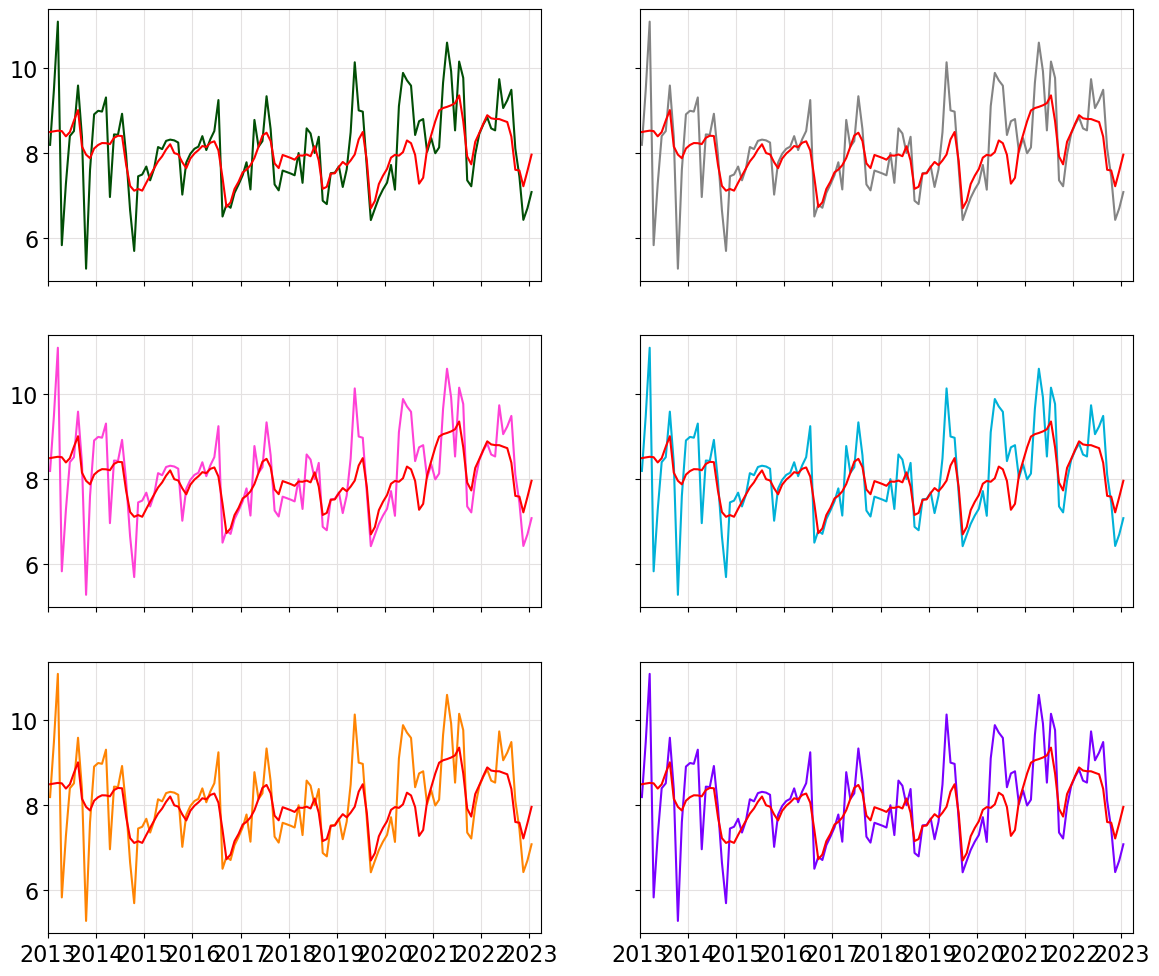

In [556]:
fig,ax = plt.subplots(3,2,sharex='all', sharey='all',figsize=(14, 12))
for region in regions_name:
    if region == 'CE':
        color_code1 = '#B7FCFF'; # This is the light color
        color_code2  = '#00B1D8';x=1;y=1;
    elif region == 'SE':
        color_code1 = '#E7D6FA'; # This is the light color
        color_code2  = '#7900FF';x=2;y=1;
    elif region == 'SW':
        color_code1 = '#F9DBBB'; # This is the light color
        color_code2  = '#FF8403';x=2;y=0;
    elif region == 'CW':
        color_code1 = '#FFB8BF'; # This is the light color
        color_code2  = '#ff41d6';x=1;y=0;
    elif region == 'NW':
        color_code1 = '#A1FC77'; # This is the light color
        color_code2  = '#014E05'; x=0;y=0;
    else:
        color_code1 = '#848484'; # This is the light color
        color_code2  = '#848484';x=0;y=1;

    term_ablation2_normalized = [];
    discharge2_normalized = [];
    for i in range(len(csv_file)):
        j = 0;
        term_ablation2_normalized.append([]) # Initialize an empty list for each index in term_ablation2
        discharge2_normalized.append([]);

        for j in range(len_max):
        # range(len(csv_file[i].term_abl_year)):
            term_ablation2_normalized[i].append(csv_file[i].term_abl_year[j])
            discharge2_normalized[i].append(csv_file[i].discharge[j])
            # date_axis[i].append(csv_file[i].dates[j]);
            # date_axis[i] = csv_file[i].dates[j]
            j+=1;
    
    mean_term_abl_normalized = [];
    mean_discharge_normalized2 = [];
    for i in range(len(term_ablation2_normalized[0])):
        counter = 0;
        sum_term_abl = 0; discharge_sum = 0;
        for j in range(len(term_ablation2)):
            sum_term_abl = sum_term_abl + term_ablation2_normalized[j][i]
            discharge_sum = discharge_sum +  discharge2_normalized[j][i]
            counter += 1;
        mean_term_abl_normalized.append(sum_term_abl);
        mean_discharge_normalized2.append(discharge_sum);
    
    # plt.savefig(root_path + 'Results/Images/Regional_Figures/'+'Normalized_Time_series_for ' + region +'.png',dpi=300,bbox_inches='tight', pad_inches=0)
    columns = {'date': date_axis,'normalized_term_abl': mean_term_abl_normalized,'normalized_discharge':mean_discharge_normalized}
    mean_df = pd.DataFrame(data=columns)
    # mean_df.to_csv(root_path + 'Results/Output/Normalized_Terminus_Ablation/'+'Normalized_Time_series_for_' + region + '.csv')
    
    term_abl_color = color_code2
    discharge_color = '#ff0000ff'
    ax[x][y].plot(term_abl_df['date'],mean_term_abl_normalized, color = term_abl_color)
    ax[x][y].plot(term_abl_df['date'],mean_discharge_normalized2, color = discharge_color)
    ax[x][y].set_xlim(np.datetime64('2013-01-01'), np.datetime64('2023-03-31'))
    # ax[x][y].set_ylim(-0.45,1)
    ax[x][y].grid('on',color = '#E4E1E1')
    # plt.xlabel('Years',fontsize = 14)
    # plt.ylabel('Normalized flux',fontsize = 14)
    # plt.legend(['Normalized terminus ablation','Normalized discharge'],loc = 'best')
    # plt.tight_layout()
plt.show()
    # plt.savefig(root_path + 'Results/Images/Regional_Figures/'+'Ice_flux_ ' + region +'.png',dpi=300)

In [ ]:
term_ablation2 = [];
discharge = [];
date_axis = [];
l = [];
for i in range(len(csv_file)):
    l.append(len(csv_file[i]));
len_max = np.min(l)
min_idx = pd.Series(l).idxmin()
#just to make the length of vectors equal   
for date in csv_file[min_idx].dates:
    date_axis.append(date)
for i in range(len(csv_file)):
    j = 0;
    term_ablation2.append([])# Initialize an empty list for each index in term_ablation2
    discharge.append([])
    for j in range(len_max):
    # range(len(csv_file[i].term_abl_year)):
        term_ablation2[i].append(csv_file[i].term_abl_year[j])
        discharge[i].append(csv_file[i].discharge[j])
        # date_axis[i].append(csv_file[i].dates[j]);
        # date_axis[i] = csv_file[i].dates[j]
        j+=1;
total_term_abl = [];
total_discharge = [];
for i in range(len(term_ablation2[0])):
    counter = 0;
    sum_term_abl = 0;
    sum_discharge  = 0;
    for j in range(len(term_ablation2)):
        sum_term_abl = sum_term_abl + term_ablation2[j][i]
        sum_discharge = sum_discharge + discharge[j][i]
    total_term_abl.append(sum_term_abl);
    total_discharge.append(sum_discharge);
date_np = pd.to_datetime(date_axis)
plt.plot(date_np,total_term_abl, color = color_code2)
plt.plot(date_np,total_discharge, color = color_code2)
# plt.xlabel('Years',fontsize = 14)
# plt.ylabel('Terminus Ablation (Gt/year)',fontsize = 14)
# plt.title('Time series for ' + region)
# # plt.xticks(dates_ticks,dates_label,fontsize = 13,weight='bold');
# # plt.xlim(date_axis[0], '01-Jul-2022')
# # plt.yticks(fontsize = 13,weight='bold');
# plt.tight_layout()
# plt.grid('on',color = '#E4E1E1')
# # root_path + 'Results/Output/'
# unique_dates = csvs_df['dates'].drop_duplicates()
# plt.plot(total_term_abl,color=color_code2, label='mean')
plt.xlim(np.datetime64('2013-01-01'), np.datetime64('2023-03-31'))

In [ ]:
fig

In [ ]:
root_path = '/Users/amankc/Terminus_Ablation/';
regions_name = ['NW','NE','CW','CE','SE','SW']
fig,ax = plt.subplots(3,2,sharex='all', sharey='all',figsize=(14, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.tight_layout()
for region in regions_name:
    if region == 'CE':
        color_code1 = '#B7FCFF'; # This is the light color
        color_code2  = '#00B1D8';x=1;y=1;
    elif region == 'SE':
        color_code1 = '#E7D6FA'; # This is the light color
        color_code2  = '#7900FF';x=2;y=1;
    elif region == 'SW':
        color_code1 = '#F9DBBB'; # This is the light color
        color_code2  = '#FF8403';x=2;y=0;
    elif region == 'CW':
        color_code1 = '#FFB8BF'; # This is the light color
        color_code2  = '#ff41d6';x=1;y=0;
    elif region == 'NW':
        color_code1 = '#A1FC77'; # This is the light color
        color_code2  = '#014E05'; x=0;y=0;
    else:
        color_code1 = '#848484'; # This is the light color
        color_code2  = '#848484';x=0;y=1;
    
    import glob
    directory_path = root_path + 'Results/Output/Term_Ablation_Latest/'
    file_pattern = 'Term_Ablation_latest_updated_*' + region +'*.csv'  # Replace this with your desired file pattern
    
    # Use glob to find files matching the pattern in the directory
    matching_files = glob.glob(directory_path + file_pattern)
    
    csv_file = [];
    for file in matching_files:
        csv_file.append(pd.read_csv(file))
    
    term_ablation2 = [];
    discharge = [];
    date_axis = [];
    l = [];
    for i in range(len(csv_file)):
        l.append(len(csv_file[i]));
    len_max = np.min(l)
    min_idx = pd.Series(l).idxmin()
    #just to make the length of vectors equal   
    for date in csv_file[min_idx].dates:
        date_axis.append(date)
    for i in range(len(csv_file)):
        j = 0;
        term_ablation2.append([])# Initialize an empty list for each index in term_ablation2
        discharge.append([])
        for j in range(len_max):
        # range(len(csv_file[i].term_abl_year)):
            term_ablation2[i].append(csv_file[i].term_abl_year[j])
            discharge[i].append(csv_file[i].discharge[j])
            # date_axis[i].append(csv_file[i].dates[j]);
            # date_axis[i] = csv_file[i].dates[j]
            j+=1;
    mean_term_abl = [];
    mean_discharge = [];
    for i in range(len(term_ablation2[0])):
        counter = 0;
        sum_term_abl = 0;
        sum_discharge  = 0;
        for j in range(len(term_ablation2)):
            sum_term_abl = sum_term_abl + term_ablation2[j][i]
            sum_discharge = sum_discharge + discharge[j][i]
            counter += 1;
        mean_term_abl.append(sum_term_abl/counter);
        mean_discharge.append(sum_discharge/counter);
    
    # new step
    csvs_df = pd.DataFrame()
    for i, file in enumerate(matching_files):
        df = pd.read_csv(file)
        df['site_number'] = i
        csvs_df = pd.concat([csvs_df, df])
    csvs_df.reset_index(drop=True, inplace=True)
    # convert dates to pandas.datetime
    csvs_df['dates'] = pd.to_datetime(csvs_df['dates'])
    
    # grab unique dates
    unique_dates = csvs_df['dates'].drop_duplicates()
    discharge_mean = [csvs_df.loc[csvs_df['dates']==date]['discharge'].mean() for date in unique_dates]
    term_ablation_mean = [csvs_df.loc[csvs_df['dates']==date]['term_abl_year'].mean() for date in unique_dates]
    
    #new step
    # Normailze the figure
    term_ablation2_normalized = [];
    discharge_normalized = [];
    for i in range(len(csv_file)):
        j = 0;
        term_ablation2_normalized.append([]) # Initialize an empty list for each index in term_ablation2
        discharge_normalized.append([]);
        mean_value = np.mean(csv_file[i].term_abl_year)
        max_value = np.max(csv_file[i].term_abl_year-mean_value)
    
        mean_value_dis = np.mean(csv_file[i].discharge)
        max_value_dis = np.max(csv_file[i].discharge-mean_value_dis)
        for j in range(len_max):
        # range(len(csv_file[i].term_abl_year)):
            term_ablation2_normalized[i].append((csv_file[i].term_abl_year[j]-mean_value)/max_value)
            discharge_normalized[i].append((csv_file[i].discharge[j]-mean_value_dis)/max_value_dis)
            # date_axis[i].append(csv_file[i].dates[j]);
            # date_axis[i] = csv_file[i].dates[j]
            j+=1;
    
    mean_term_abl_normalized = [];
    mean_discharge_normalized = [];
    for i in range(len(term_ablation2_normalized[0])):
        counter = 0;
        sum_term_abl = 0; discharge_sum = 0;
        for j in range(len(term_ablation2)):
            sum_term_abl = sum_term_abl + term_ablation2_normalized[j][i]
            discharge_sum = discharge_sum +  discharge_normalized[j][i]
            counter += 1;
        mean_term_abl_normalized.append(sum_term_abl/counter);
        mean_discharge_normalized.append(discharge_sum/counter);
    columns = {'date': date_axis,'normalized_term_abl': mean_term_abl_normalized,'normalized_discharge':mean_discharge_normalized}
    mean_df = pd.DataFrame(data=columns)
    mean_df.to_csv(root_path + 'Results/Output/Normalized_Terminus_Ablation/'+'Normalized_Time_series_for_' + region + '.csv')
    
    
    date_array = np.array(date_axis)
    mean_ta_array = np.array(mean_term_abl_normalized)
    term_abl_df = pd.DataFrame({'date': date_array,'mean_ta_normalized': mean_ta_array})
    # for i in range(len(term_ablation2_normalized)):
    #     term_abl_array[i] = np.array(term_ablation2_normalized[0])
    plt.figure(figsize=(14,8)) 
    term_abl_df['date'] = pd.to_datetime(term_abl_df['date'])
    date_array = np.array(date_axis)
    mean_dis_array = np.array(mean_discharge_normalized)
    dis_df = pd.DataFrame({'date': date_array,'mean_dis_normalized': mean_discharge_normalized})
    
    # Normailze the figure
    term_ablation2_normalized = [];
    discharge2_normalized = [];
    for i in range(len(csv_file)):
        j = 0;
        term_ablation2_normalized.append([]) # Initialize an empty list for each index in term_ablation2
        discharge2_normalized.append([]);
        mean_value = np.mean(csv_file[i].term_abl_year)
        max_value = np.max(csv_file[i].term_abl_year-mean_value)
    
        mean_value_dis = np.mean(csv_file[i].discharge)
        max_value_dis = np.max(csv_file[i].discharge-mean_value_dis)
        for j in range(len_max):
        # range(len(csv_file[i].term_abl_year)):
            term_ablation2_normalized[i].append((csv_file[i].term_abl_year[j]-mean_value)/max_value)
            discharge2_normalized[i].append((csv_file[i].discharge[j]-mean_value)/max_value)
            # date_axis[i].append(csv_file[i].dates[j]);
            # date_axis[i] = csv_file[i].dates[j]
            j+=1;
    
    mean_term_abl_normalized = [];
    mean_discharge_normalized2 = [];
    for i in range(len(term_ablation2_normalized[0])):
        counter = 0;
        sum_term_abl = 0; discharge_sum = 0;
        for j in range(len(term_ablation2)):
            sum_term_abl = sum_term_abl + term_ablation2_normalized[j][i]
            discharge_sum = discharge_sum +  discharge2_normalized[j][i]
            counter += 1;
        mean_term_abl_normalized.append(sum_term_abl/counter);
        mean_discharge_normalized2.append(discharge_sum/counter);
    term_abl_color = color_code2
    discharge_color = '#ff0000ff'
    ax[x][y].plot(term_abl_df['date'],mean_term_abl_normalized, color = term_abl_color)
    ax[x][y].plot(term_abl_df['date'],mean_discharge_normalized2, color = discharge_color)
    ax[x][y].set_xlim(np.datetime64('2013-01-01'), np.datetime64('2023-03-31'))
    ax[x][y].set_ylim(-0.45,1)
    ax[x][y].grid('on',color = '#E4E1E1')
    ax[x][y].legend(['Normalized terminus ablation','Normalized discharge'],loc = 'best')
# ax2 = plt.gca()
for row in ax:
    for subplot in row:
        # Set parameters for each subplot
        subplot.tick_params(labelsize=14)

fig.savefig(root_path + 'Results/Images/Regional_Figures/'+'Normalized_discharge_term-ablation_updated'+'.png',dpi=300)
plt.show()








# Normailze the figure
term_ablation2_normalized = [];
discharge_normalized = [];
for i in range(len(csv_file)):
    j = 0;
    term_ablation2_normalized.append([]) # Initialize an empty list for each index in term_ablation2
    discharge_normalized.append([]);
    mean_value = np.mean(csv_file[i].term_abl_year)
    max_value = np.max(csv_file[i].term_abl_year-mean_value)

    mean_value_dis = np.mean(csv_file[i].discharge)
    max_value_dis = np.max(csv_file[i].discharge-mean_value_dis)
    for j in range(len_max):
    # range(len(csv_file[i].term_abl_year)):
        term_ablation2_normalized[i].append((csv_file[i].term_abl_year[j]-mean_value)/max_value)
        discharge_normalized[i].append((csv_file[i].discharge[j]-mean_value_dis)/max_value_dis)
        # date_axis[i].append(csv_file[i].dates[j]);
        # date_axis[i] = csv_file[i].dates[j]
        j+=1;

mean_term_abl_normalized = [];
mean_discharge_normalized = [];
for i in range(len(term_ablation2_normalized[0])):
    counter = 0;
    sum_term_abl = 0; discharge_sum = 0;
    for j in range(len(term_ablation2)):
        sum_term_abl = sum_term_abl + term_ablation2_normalized[j][i]
        discharge_sum = discharge_sum +  discharge_normalized[j][i]
        counter += 1;
    mean_term_abl_normalized.append(sum_term_abl/counter);
    mean_discharge_normalized.append(discharge_sum/counter);
# fig,ax = plt.subplots()
plt.figure(figsize=(14,8)) 
# ax = plt.plot(term_ablation2_normalized[0], color = color_code1)
#ax = plt.plot(date_axis, term_ablation2[0], color = color_code1) # Run this with the X axis 
for i in range(len(term_ablation2_normalized)):
    plt.plot(date_axis,term_ablation2_normalized[i], color = color_code1)
plt.plot(date_axis,mean_term_abl_normalized,marker='*',color = color_code2)
plt.xlabel('Years',fontsize = 14)
plt.ylabel('Normalized terminus ablation',fontsize = 14)
# plt.title('Normalized Time series for ' + region)
# ticks_data = ['01-Jan-2013','01-Jan-2014','01-Jan-2015','01-Jan-2016','01-Jan-2017','01-Jan-2018','01-Jan-2019','01-Jan-2020','01-Jan-2021','01-Jan-2022','01-Jan-2023']
# plt.xticks(ticks_data,rotation=90)
xz = 0;

interval = 12;
dates_ticks = [];
dates_label = [];
for date in date_axis:
    if xz%interval == 0:
        dates_ticks.append(date)
        dates_label.append(date[7:])
    xz+=1
    
plt.xticks(dates_ticks,dates_label,fontsize = 13,weight='bold');
plt.yticks(fontsize = 13,weight='bold');
plt.grid('on',color = '#E4E1E1')
plt.tight_layout()
plt.savefig(root_path + 'Results/Images/Updated_Regional_Figures/'+'Normalized_Time_series_for ' + region +'.png',dpi=300)
# plt.savefig(root_path + 'Results/Images/Regional_Figures/'+'Normalized_Time_series_for ' + region +'.png',dpi=300,bbox_inches='tight', pad_inches=0)
columns = {'date': date_axis,'normalized_term_abl': mean_term_abl_normalized,'normalized_discharge':mean_discharge_normalized}
mean_df = pd.DataFrame(data=columns)
mean_df.to_csv(root_path + 'Results/Output/Normalized_Terminus_Ablation/'+'Normalized_Time_series_for_' + region + '.csv')


In [ ]:
#edit this 
root_path = '/Users/amankc/Terminus_Ablation/';
regions_name = ['NW','NE','CW','CE','SE','SW']
fig,ax = plt.subplots(3,2,sharex='all', sharey='all',figsize=(14, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.tight_layout()
for region in regions_name:
    if region == 'CE':
        color_code1 = '#B7FCFF'; # This is the light color
        color_code2  = '#00B1D8';x=1;y=1;
    elif region == 'SE':
        color_code1 = '#E7D6FA'; # This is the light color
        color_code2  = '#7900FF';x=2;y=1;
    elif region == 'SW':
        color_code1 = '#F9DBBB'; # This is the light color
        color_code2  = '#FF8403';x=2;y=0;
    elif region == 'CW':
        color_code1 = '#FFB8BF'; # This is the light color
        color_code2  = '#ff41d6';x=1;y=0;
    elif region == 'NW':
        color_code1 = '#A1FC77'; # This is the light color
        color_code2  = '#014E05'; x=0;y=0;
    else:
        color_code1 = '#848484'; # This is the light color
        color_code2  = '#848484';x=0;y=1;
    
    import glob
    directory_path = root_path + 'Results/Output/Term_Ablation_Latest/'
    file_pattern = 'Term_Ablation_latest_updated_*' + region +'*.csv'  # Replace this with your desired file pattern
    
    # Use glob to find files matching the pattern in the directory
    matching_files = glob.glob(directory_path + file_pattern)
    
    csv_file = [];
    for file in matching_files:
        csv_file.append(pd.read_csv(file))
    
    term_ablation2 = [];
    discharge = [];
    date_axis = [];
    l = [];
    for i in range(len(csv_file)):
        l.append(len(csv_file[i]));
    len_max = np.min(l)
    min_idx = pd.Series(l).idxmin()
    #just to make the length of vectors equal   
    for date in csv_file[min_idx].dates:
        date_axis.append(date)
    for i in range(len(csv_file)):
        j = 0;
        term_ablation2.append([])# Initialize an empty list for each index in term_ablation2
        discharge.append([])
        for j in range(len_max):
        # range(len(csv_file[i].term_abl_year)):
            term_ablation2[i].append(csv_file[i].term_abl_year[j])
            discharge[i].append(csv_file[i].discharge[j])
            # date_axis[i].append(csv_file[i].dates[j]);
            # date_axis[i] = csv_file[i].dates[j]
            j+=1;
    mean_term_abl = [];
    mean_discharge = [];
    for i in range(len(term_ablation2[0])):
        counter = 0;
        sum_term_abl = 0;
        sum_discharge  = 0;
        for j in range(len(term_ablation2)):
            sum_term_abl = sum_term_abl + term_ablation2[j][i]
            sum_discharge = sum_discharge + discharge[j][i]
            counter += 1;
        mean_term_abl.append(sum_term_abl/counter);
        mean_discharge.append(sum_discharge/counter);
    
    # new step
    csvs_df = pd.DataFrame()
    for i, file in enumerate(matching_files):
        df = pd.read_csv(file)
        df['site_number'] = i
        csvs_df = pd.concat([csvs_df, df])
    csvs_df.reset_index(drop=True, inplace=True)
    # convert dates to pandas.datetime
    csvs_df['dates'] = pd.to_datetime(csvs_df['dates'])
    
    # grab unique dates
    unique_dates = csvs_df['dates'].drop_duplicates()
    discharge_mean = [csvs_df.loc[csvs_df['dates']==date]['discharge'].mean() for date in unique_dates]
    term_ablation_mean = [csvs_df.loc[csvs_df['dates']==date]['term_abl_year'].mean() for date in unique_dates]
    
    #new step
    # Normailze the figure
    term_ablation2_normalized = [];
    discharge_normalized = [];
    for i in range(len(csv_file)):
        j = 0;
        term_ablation2_normalized.append([]) # Initialize an empty list for each index in term_ablation2
        discharge_normalized.append([]);
        mean_value = np.mean(csv_file[i].term_abl_year)
        max_value = np.max(csv_file[i].term_abl_year-mean_value)
    
        mean_value_dis = np.mean(csv_file[i].discharge)
        max_value_dis = np.max(csv_file[i].discharge-mean_value_dis)
        for j in range(len_max):
        # range(len(csv_file[i].term_abl_year)):
            term_ablation2_normalized[i].append((csv_file[i].term_abl_year[j]-mean_value)/max_value)
            discharge_normalized[i].append((csv_file[i].discharge[j]-mean_value_dis)/max_value_dis)
            # date_axis[i].append(csv_file[i].dates[j]);
            # date_axis[i] = csv_file[i].dates[j]
            j+=1;
    
    mean_term_abl_normalized = [];
    mean_discharge_normalized = [];
    for i in range(len(term_ablation2_normalized[0])):
        counter = 0;
        sum_term_abl = 0; discharge_sum = 0;
        for j in range(len(term_ablation2)):
            sum_term_abl = sum_term_abl + term_ablation2_normalized[j][i]
            discharge_sum = discharge_sum +  discharge_normalized[j][i]
            counter += 1;
        mean_term_abl_normalized.append(sum_term_abl/counter);
        mean_discharge_normalized.append(discharge_sum/counter);
    columns = {'date': date_axis,'normalized_term_abl': mean_term_abl_normalized,'normalized_discharge':mean_discharge_normalized}
    mean_df = pd.DataFrame(data=columns)
    mean_df.to_csv(root_path + 'Results/Output/Normalized_Terminus_Ablation/'+'Normalized_Time_series_for_' + region + '.csv')
    
    
    date_array = np.array(date_axis)
    mean_ta_array = np.array(mean_term_abl_normalized)
    term_abl_df = pd.DataFrame({'date': date_array,'mean_ta_normalized': mean_ta_array})
    # for i in range(len(term_ablation2_normalized)):
    #     term_abl_array[i] = np.array(term_ablation2_normalized[0])
    plt.figure(figsize=(14,8)) 
    term_abl_df['date'] = pd.to_datetime(term_abl_df['date'])
    date_array = np.array(date_axis)
    mean_dis_array = np.array(mean_discharge_normalized)
    dis_df = pd.DataFrame({'date': date_array,'mean_dis_normalized': mean_discharge_normalized})
    
    # Normailze the figure
    term_ablation2_normalized = [];
    discharge2_normalized = [];
    for i in range(len(csv_file)):
        j = 0;
        term_ablation2_normalized.append([]) # Initialize an empty list for each index in term_ablation2
        discharge2_normalized.append([]);
        mean_value = np.mean(csv_file[i].term_abl_year)
        max_value = np.max(csv_file[i].term_abl_year-mean_value)
    
        mean_value_dis = np.mean(csv_file[i].discharge)
        max_value_dis = np.max(csv_file[i].discharge-mean_value_dis)
        for j in range(len_max):
        # range(len(csv_file[i].term_abl_year)):
            term_ablation2_normalized[i].append((csv_file[i].term_abl_year[j]-mean_value)/max_value)
            discharge2_normalized[i].append((csv_file[i].discharge[j]-mean_value)/max_value)
            # date_axis[i].append(csv_file[i].dates[j]);
            # date_axis[i] = csv_file[i].dates[j]
            j+=1;
    
    mean_term_abl_normalized = [];
    mean_discharge_normalized2 = [];
    for i in range(len(term_ablation2_normalized[0])):
        counter = 0;
        sum_term_abl = 0; discharge_sum = 0;
        for j in range(len(term_ablation2)):
            sum_term_abl = sum_term_abl + term_ablation2_normalized[j][i]
            discharge_sum = discharge_sum +  discharge2_normalized[j][i]
            counter += 1;
        mean_term_abl_normalized.append(sum_term_abl/counter);
        mean_discharge_normalized2.append(discharge_sum/counter);
    term_abl_color = color_code2
    discharge_color = '#ff0000ff'
    ax[x][y].plot(term_abl_df['date'],mean_term_abl_normalized, color = term_abl_color)
    ax[x][y].plot(term_abl_df['date'],mean_discharge_normalized2, color = discharge_color)
    ax[x][y].set_xlim(np.datetime64('2013-01-01'), np.datetime64('2023-03-31'))
    ax[x][y].set_ylim(-0.45,1)
    ax[x][y].grid('on',color = '#E4E1E1')
    ax[x][y].legend(['Normalized terminus ablation','Normalized discharge'],loc = 'best')
# ax2 = plt.gca()
for row in ax:
    for subplot in row:
        # Set parameters for each subplot
        subplot.tick_params(labelsize=14)

# fig.savefig(root_path + 'Results/Images/Regional_Figures/'+'Normalized_discharge_term-ablation_updated'+'.png',dpi=300)
plt.show()

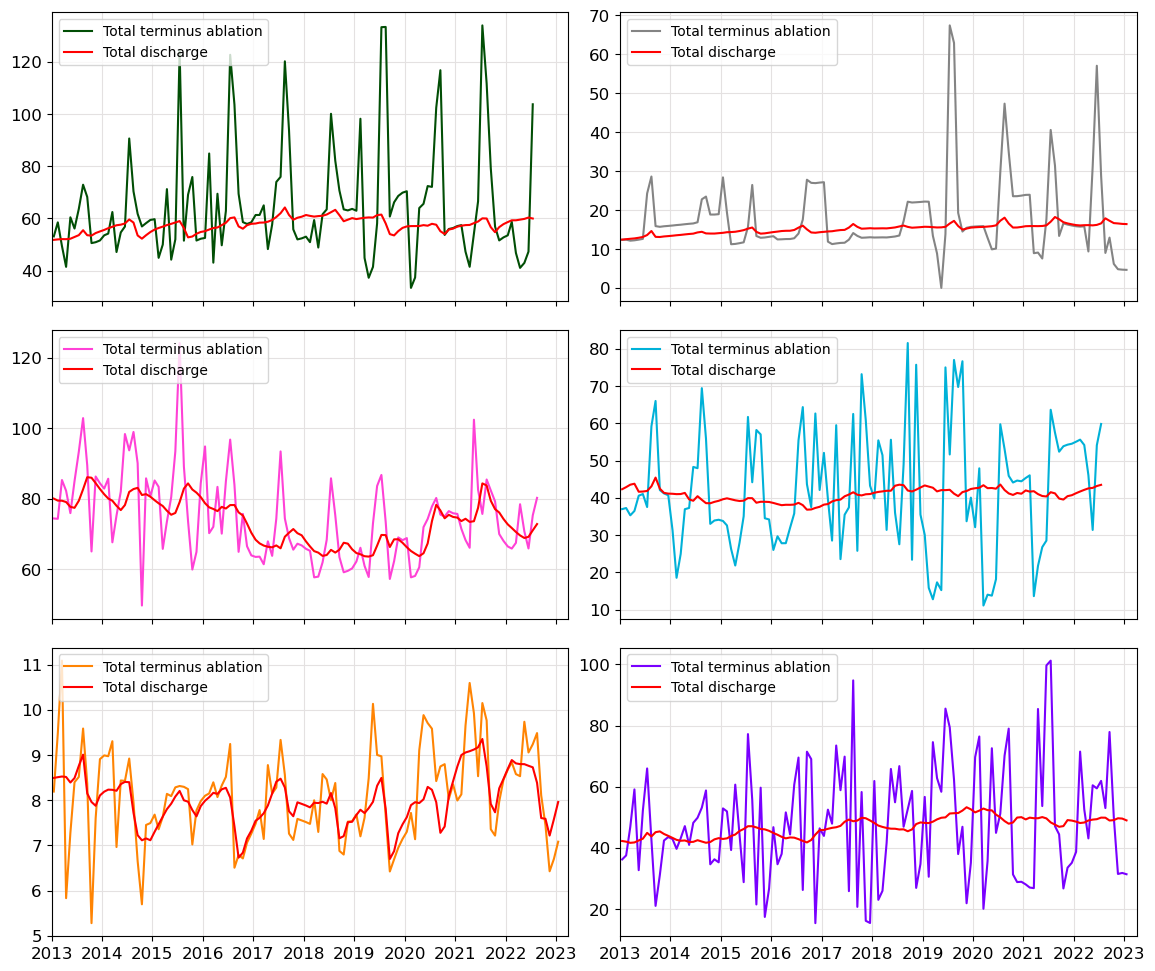

In [557]:
root_path = '/Users/amankc/Terminus_Ablation/'
regions_name = ['NW', 'NE', 'CW', 'CE', 'SE', 'SW']
output_path = os.path.join(root_path, 'Results/Output/Term_Ablation_Latest/')
total_output_path = os.path.join(root_path, 'Results/Output/Total_Terminus_Ablation/')
fig, ax = plt.subplots(3, 2, sharex=True, sharey=False, figsize=(14, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

color_codes = {
    'CE': ('#B7FCFF', '#00B1D8', 1, 1),
    'SE': ('#E7D6FA', '#7900FF', 2, 1),
    'SW': ('#F9DBBB', '#FF8403', 2, 0),
    'CW': ('#FFB8BF', '#ff41d6', 1, 0),
    'NW': ('#A1FC77', '#014E05', 0, 0),
    'NE': ('#848484', '#848484', 0, 1)
}

for region, (color_code1, color_code2, x, y) in color_codes.items():
    file_pattern = f'Term_Ablation_latest_updated_*{region}*.csv'
    matching_files = glob.glob(os.path.join(output_path, file_pattern))
    
    csv_files = [pd.read_csv(file) for file in matching_files]

    # Ensure all CSV files have the same length by trimming
    min_length = min(len(df) for df in csv_files)
    csv_files = [df.head(min_length) for df in csv_files]

    date_axis = csv_files[0]['dates']
    
    # Compute the total of term_ablation and discharge
    total_term_abl = np.sum([df['term_abl_year'].values for df in csv_files], axis=0)
    total_discharge = np.sum([df['discharge'].values for df in csv_files], axis=0)

    # Create a DataFrame to save the total data
    total_df = pd.DataFrame({
        'date': date_axis,
        'total_term_abl': total_term_abl,
        'total_discharge': total_discharge
    })
    # total_df.to_csv(os.path.join(total_output_path, f'Total_Time_series_for_{region}.csv'), index=False)
    
    # Plotting
    ax[x, y].plot(pd.to_datetime(date_axis), total_term_abl, color=color_code2, label='Total terminus ablation')
    ax[x, y].plot(pd.to_datetime(date_axis), total_discharge, color='#ff0000ff', label='Total discharge')
    ax[x, y].set_xlim(np.datetime64('2013-01-01'), np.datetime64('2023-03-31'))
    ax[x, y].grid(True, color='#E4E1E1')
    ax[x, y].legend(loc='upper left')

for subplot in ax.flatten():
    subplot.tick_params(labelsize=12)
    
fig.savefig(root_path + 'Results/Images/Regional_Figures/'+'Total_discharge_term-ablation_updated'+'.png',dpi=300)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

root_path = '/Users/amankc/Terminus_Ablation/'
regions_name = ['NW', 'NE', 'CW', 'CE', 'SE', 'SW']
output_path = os.path.join(root_path, 'Results/Output/Term_Ablation_Latest/')
total_output_path = os.path.join(root_path, 'Results/Output/Total_Terminus_Ablation/')
fig, ax = plt.subplots(3, 2, sharex=True, sharey=False, figsize=(14, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

color_codes = {
    'CE': ('#B7FCFF', '#00B1D8', 1, 1),
    'SE': ('#E7D6FA', '#7900FF', 2, 1),
    'SW': ('#F9DBBB', '#FF8403', 2, 0),
    'CW': ('#FFB8BF', '#ff41d6', 1, 0),
    'NW': ('#A1FC77', '#014E05', 0, 0),
    'NE': ('#848484', '#848484', 0, 1)
}

def get_season(month):
    '''Function to map month to season'''
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

for region, (color_code1, color_code2, x, y) in color_codes.items():
    file_pattern = f'Term_Ablation_latest_updated_*{region}*.csv'
    matching_files = glob.glob(os.path.join(output_path, file_pattern))
    
    csv_files = [pd.read_csv(file) for file in matching_files]

    # Ensure all CSV files have the same length by trimming
    min_length = min(len(df) for df in csv_files)
    csv_files = [df.head(min_length) for df in csv_files]

    date_axis = csv_files[0]['dates']
    
    # Compute the total of term_ablation and discharge
    total_term_abl = np.sum([df['term_abl_year'].values for df in csv_files], axis=0)
    total_discharge = np.sum([df['discharge'].values for df in csv_files], axis=0)

    # Create a DataFrame to save the total data
    total_df = pd.DataFrame({
        'date': pd.to_datetime(date_axis, format='%d-%b-%Y'),
        'total_term_abl': total_term_abl,
        'total_discharge': total_discharge
    })

    # Add a season column
    total_df['season'] = total_df['date'].dt.month.apply(get_season)
    total_df['year'] = total_df['date'].dt.year

    seasonal_sums = total_df.groupby('season').mean(numeric_only=True)
    print(region)
    print(seasonal_sums)
    # Group by year and season and calculate the sum for each season
    # seasonal_totals = total_df.groupby(['year', 'season']).sum().reset_index()
    
    # Save the seasonal totals to a CSV file
    # seasonal_totals.to_csv(os.path.join(total_output_path, f'Seasonal_Totals_for_{region}.csv'), index=False)
    
    # Plotting
    ax[x, y].plot(total_df['date'], total_term_abl, color=color_code2, label='Total terminus ablation')
    ax[x, y].plot(total_df['date'], total_discharge, color='#ff0000ff', label='Total discharge')
    ax[x, y].set_xlim(np.datetime64('2013-01-01'), np.datetime64('2023-03-31'))
    ax[x, y].grid(True, color='#E4E1E1')
    ax[x, y].legend(loc='upper left')
    del seasonal_sums

for subplot in ax.flatten():
    subplot.tick_params(labelsize=12)
    
fig.savefig(root_path + 'Results/Images/Regional_Figures/'+'Total_discharge_term-ablation_updated'+'.png', dpi=300)
plt.show()


In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

root_path = '/Users/amankc/Terminus_Ablation/'
regions_name = ['NW', 'NE', 'CW', 'CE', 'SE', 'SW']
output_path = os.path.join(root_path, 'Results/Output/Term_Ablation_Latest/')
total_output_path = os.path.join(root_path, 'Results/Output/Total_Terminus_Ablation/')
fig, ax = plt.subplots(3, 2, sharex=True, sharey=False, figsize=(14, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

color_codes = {
    'CE': ('#B7FCFF', '#00B1D8', 1, 1),
    'SE': ('#E7D6FA', '#7900FF', 2, 1),
    'SW': ('#F9DBBB', '#FF8403', 2, 0),
    'CW': ('#FFB8BF', '#ff41d6', 1, 0),
    'NW': ('#A1FC77', '#014E05', 0, 0),
    'NE': ('#848484', '#848484', 0, 1)
}

for region, (color_code1, color_code2, x, y) in color_codes.items():
    file_pattern = f'Term_Ablation_latest_updated_*{region}*.csv'
    matching_files = glob.glob(os.path.join(output_path, file_pattern))
    
    csv_files = [pd.read_csv(file) for file in matching_files]

    # Ensure all CSV files have the same length by trimming
    min_length = min(len(df) for df in csv_files)
    csv_files = [df.head(min_length) for df in csv_files]

    date_axis = csv_files[0]['dates']
    
    # Compute the total of term_ablation and discharge
    total_term_abl = np.sum([df['term_abl_year'].values for df in csv_files], axis=0)
    total_discharge = np.sum([df['discharge'].values for df in csv_files], axis=0)

    # Create a DataFrame to save the total data
    total_df = pd.DataFrame({
        'date': date_axis,
        'total_term_abl': total_term_abl,
        'total_discharge': total_discharge
    })
    # total_df.to_csv(os.path.join(total_output_path, f'Total_Time_series_for_{region}.csv'), index=False)
    
    # Plotting
    ax[x, y].plot(pd.to_datetime(date_axis), total_term_abl, color=color_code2, label='Total terminus ablation')
    ax[x, y].plot(pd.to_datetime(date_axis), total_discharge, color='#ff0000ff', label='Total discharge')
    ax[x, y].set_xlim(np.datetime64('2013-01-01'), np.datetime64('2023-03-31'))
    ax[x, y].grid(True, color='#E4E1E1')
    ax[x, y].legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)

for subplot in ax.flatten():
    subplot.tick_params(labelsize=14)

plt.show()


In [ ]:
seasonal_sums = total_df.groupby('season').sum(numeric_only=True)

In [123]:
regions_name

['NW', 'NE', 'CW', 'CE', 'SE', 'SW']

ConversionError: Failed to convert value(s) to axis units: Timestamp('2013-01-01 00:00:00')

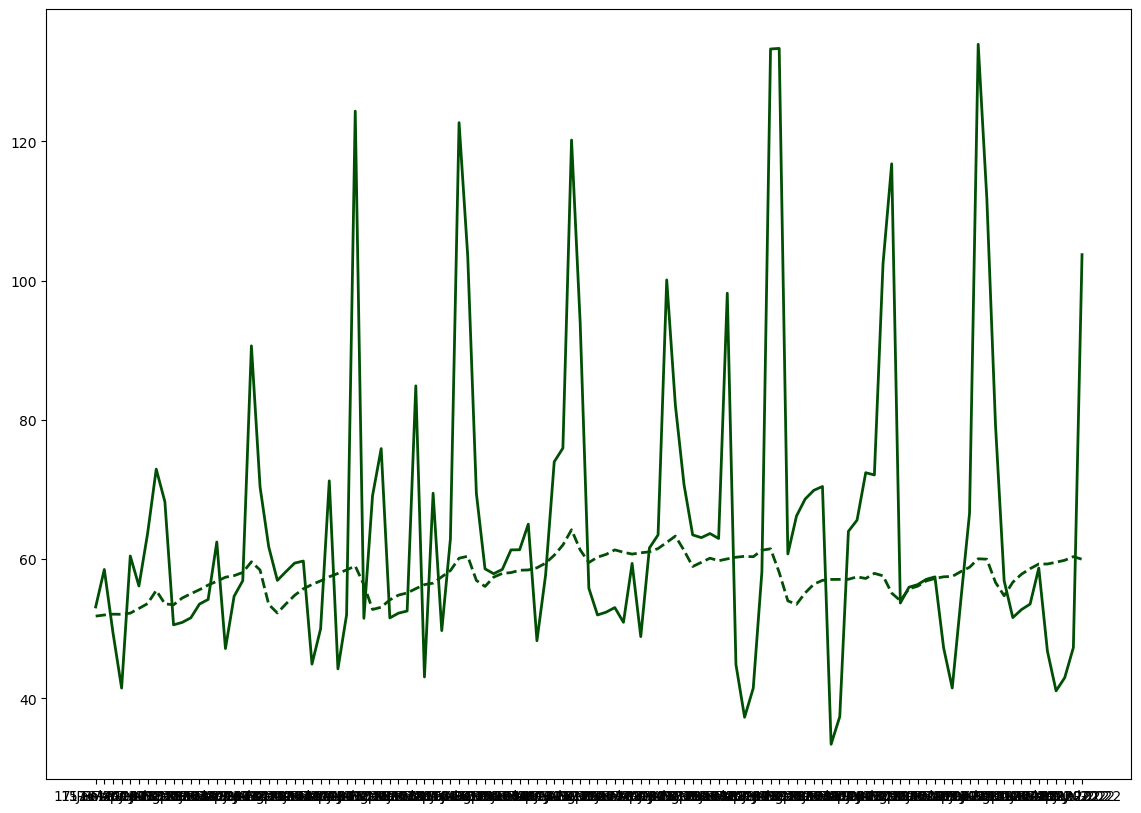

In [521]:
# fig,ax = plt.subplots(3,2,sharex='all', sharey='all',figsize=(14, 12))
plt.figure(figsize=(14,10))

east_regions_name = ['NE','CE','SE']
for region in regions_name:
    if region == 'CE':
        color_code1 = '#B7FCFF'; # This is the light color
        color_code2  = '#00B1D8';x=1;y=1;
    elif region == 'SE':
        color_code1 = '#E7D6FA'; # This is the light color
        color_code2  = '#7900FF';x=2;y=1;
    elif region == 'SW':
        color_code1 = '#F9DBBB'; # This is the light color
        color_code2  = '#FF8403';x=2;y=0;
    elif region == 'CW':
        color_code1 = '#FFB8BF'; # This is the light color
        color_code2  = '#ff41d6';x=1;y=0;
    elif region == 'NW':
        color_code1 = '#A1FC77'; # This is the light color
        color_code2  = '#014E05'; x=0;y=0;
    else:
        color_code1 = '#848484'; # This is the light color
        color_code2  = '#848484';x=0;y=1;

    directory_path = root_path + 'Results/Output/Term_Ablation_Latest/'
    file_pattern = 'Term_Ablation_latest_updated_*' + region +'*.csv'  # Replace this with your desired file pattern
    
    # Use glob to find files matching the pattern in the directory
    matching_files = glob.glob(directory_path + file_pattern)
    csv_file = [];
    for file in matching_files:
        csv_file.append(pd.read_csv(file))
    
    term_ablation2 = [];
    discharge = [];
    date_axis = [];
    l = [];
    for i in range(len(csv_file)):
        l.append(len(csv_file[i]));
    len_max = np.min(l)
    min_idx = pd.Series(l).idxmin()
    #just to make the length of vectors equal   
    for date in csv_file[min_idx].dates:
        date_axis.append(date)

    term_ablation2_normalized = [];
    discharge2_normalized = [];
    for i in range(len(csv_file)):
        j = 0;
        term_ablation2_normalized.append([]) # Initialize an empty list for each index in term_ablation2
        discharge2_normalized.append([]);
        # mean_value = np.mean(csv_file[i].term_abl_year)
        # max_value = np.max(csv_file[i].term_abl_year-mean_value)
    
        # mean_value_dis = np.mean(csv_file[i].discharge)
        # max_value_dis = np.max(csv_file[i].discharge-mean_value_dis)
        for j in range(len_max):
        # range(len(csv_file[i].term_abl_year)):
            term_ablation2_normalized[i].append(csv_file[i].term_abl_year[j])
            discharge2_normalized[i].append(csv_file[i].discharge[j])
            # date_axis[i].append(csv_file[i].dates[j]);
            # date_axis[i] = csv_file[i].dates[j]
            j+=1;

    mean_term_abl_normalized = [];
    mean_discharge_normalized2 = [];
    for i in range(len(term_ablation2_normalized[0])):
        sum_term_abl = 0; discharge_sum = 0;
        for j in range(len(term_ablation2_normalized)):
            sum_term_abl = sum_term_abl + term_ablation2_normalized[j][i]
            discharge_sum = discharge_sum +  discharge2_normalized[j][i]

        mean_term_abl_normalized.append(sum_term_abl);
        mean_discharge_normalized2.append(discharge_sum);
        
    date_array = np.array(date_axis)
    # mean_ta_array = np.array(mean_term_abl_normalized);discharge_array = np.array(mean_discharge_normalized2);
    # total_df = pd.DataFrame({'date': date_array,'total_ta': mean_ta_array,'total_discharge':discharge_array})
    mean_ta_array = np.array(mean_term_abl_normalized);discharge_array = np.array(mean_discharge_normalized2);
    total_df = pd.DataFrame({'date': date_array,'term_abl': mean_ta_array,'dis':discharge_array})
    total_dfs[region] = total_df;
    # plt.savefig(root_path + 'Results/Images/Regional_Figures/'+'Normalized_Time_series_for ' + region +'.png',dpi=300,bbox_inches='tight', pad_inches=0)
    # columns = {'date': date_array,'normalized_term_abl': mean_term_abl_normalized,'normalized_discharge':mean_discharge_normalized2}
    # mean_df = pd.DataFrame(data=columns)
    # mean_df.to_csv(root_path + 'Results/Output/Normalized_Terminus_Ablation/'+'Normalized_Time_series_for_' + region + '.csv')
    
    term_abl_color = color_code2
    discharge_color = '#ff0000ff'

    plt.plot(total_df['date'],mean_term_abl_normalized, color = term_abl_color,linestyle = '-',linewidth = 2)
    plt.plot(total_df['date'],mean_discharge_normalized2, color = term_abl_color,linestyle = '--',linewidth = 2)
    plt.xlim(pd.to_datetime('2013-01-01'), pd.to_datetime('2023-03-31'))
    # ax[x][y].set_ylim(-0.45,1)
    # ax[x][y].grid('on',color = '#E4E1E1')
    # plt.xlabel('Years',fontsize = 14)
    # plt.ylabel('Normalized flux',fontsize = 14)
    # plt.legend(['Normalized terminus ablation','Normalized discharge'],loc = 'best')
    # plt.tight_layout()
# plt.xlim(np.datetime64('2013-01-01'), np.datetime64('2023-03-31'))
    # ax[x][y].set_ylim(-0.45,1)

plt.show()
    # plt.savefig(root_path + 'Results/Images/Regional_Figures/'+'Ice_flux_ ' + region +'.png',dpi=300)

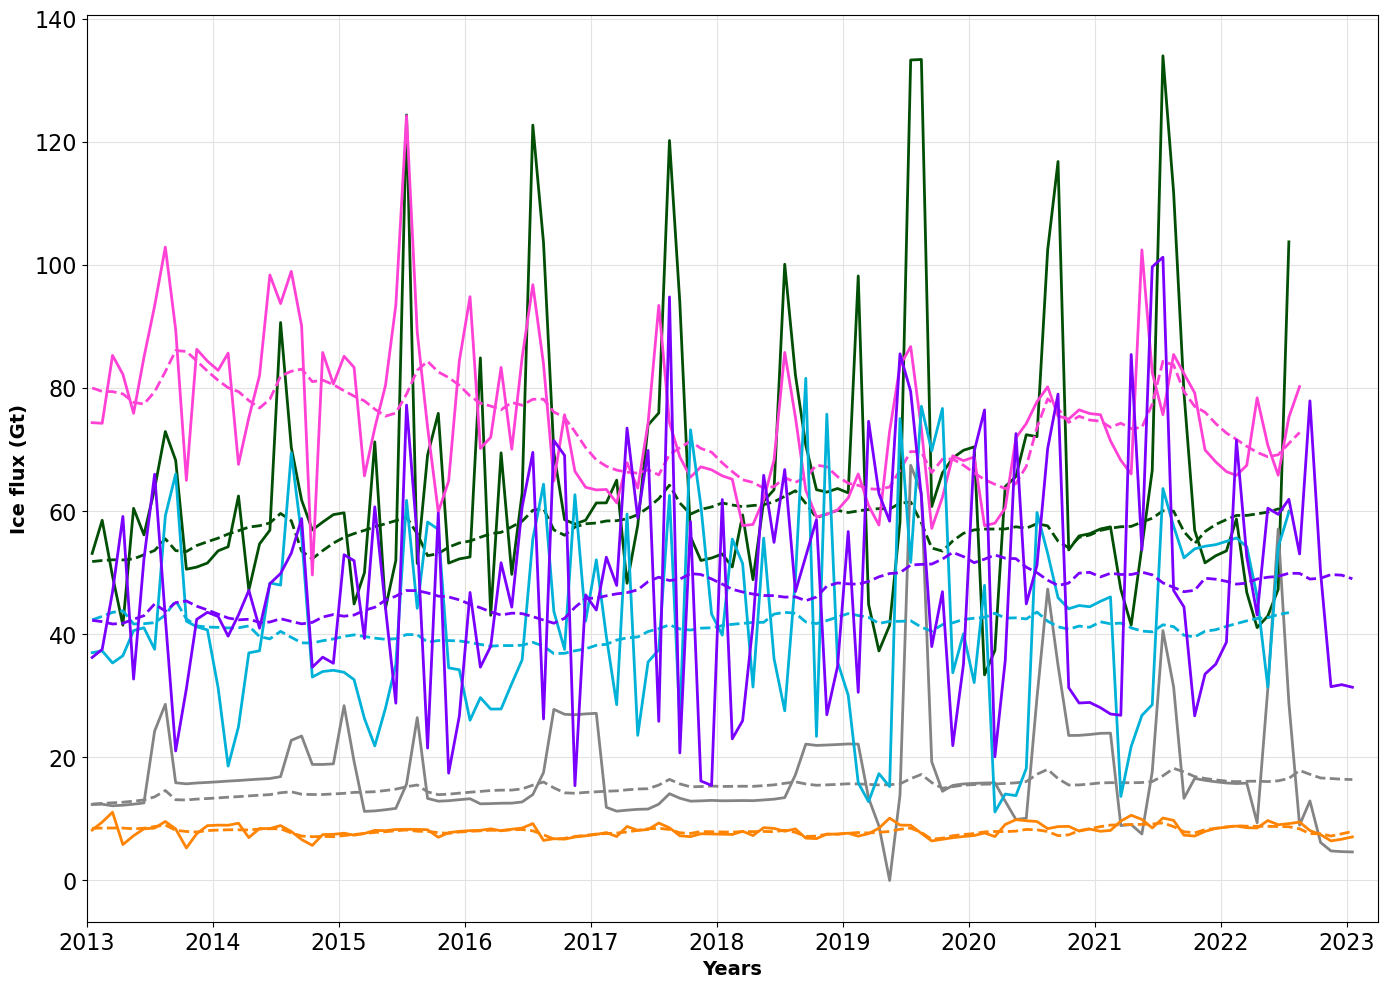

In [558]:
# fig,ax = plt.subplots(3,2,sharex='all', sharey='all',figsize=(14, 12))
plt.figure(figsize=(14,10))

east_regions_name = ['NE','CE','SE']
for region in regions_name:
    if region == 'CE':
        color_code1 = '#B7FCFF'; # This is the light color
        color_code2  = '#00B1D8';x=1;y=1;
    elif region == 'SE':
        color_code1 = '#E7D6FA'; # This is the light color
        color_code2  = '#7900FF';x=2;y=1;
    elif region == 'SW':
        color_code1 = '#F9DBBB'; # This is the light color
        color_code2  = '#FF8403';x=2;y=0;
    elif region == 'CW':
        color_code1 = '#FFB8BF'; # This is the light color
        color_code2  = '#ff41d6';x=1;y=0;
    elif region == 'NW':
        color_code1 = '#A1FC77'; # This is the light color
        color_code2  = '#014E05'; x=0;y=0;
    else:
        color_code1 = '#848484'; # This is the light color
        color_code2  = '#848484';x=0;y=1;

    directory_path = root_path + 'Results/Output/Term_Ablation_Latest/'
    file_pattern = 'Term_Ablation_latest_updated_*' + region +'*.csv'  # Replace this with your desired file pattern
    
    # Use glob to find files matching the pattern in the directory
    matching_files = glob.glob(directory_path + file_pattern)
    csv_file = [];
    for file in matching_files:
        csv_file.append(pd.read_csv(file))
    
    term_ablation2 = [];
    discharge = [];
    date_axis = [];
    l = [];
    for i in range(len(csv_file)):
        l.append(len(csv_file[i]));
    len_max = np.min(l)
    min_idx = pd.Series(l).idxmin()
    #just to make the length of vectors equal   
    for date in csv_file[min_idx].dates:
        date_axis.append(date)

    term_ablation2_normalized = [];
    discharge2_normalized = [];
    for i in range(len(csv_file)):
        j = 0;
        term_ablation2_normalized.append([]) # Initialize an empty list for each index in term_ablation2
        discharge2_normalized.append([]);
        # mean_value = np.mean(csv_file[i].term_abl_year)
        # max_value = np.max(csv_file[i].term_abl_year-mean_value)
    
        # mean_value_dis = np.mean(csv_file[i].discharge)
        # max_value_dis = np.max(csv_file[i].discharge-mean_value_dis)
        for j in range(len_max):
        # range(len(csv_file[i].term_abl_year)):
            term_ablation2_normalized[i].append(csv_file[i].term_abl_year[j])
            discharge2_normalized[i].append(csv_file[i].discharge[j])
            # date_axis[i].append(csv_file[i].dates[j]);
            # date_axis[i] = csv_file[i].dates[j]
            j+=1;

    mean_term_abl_normalized = [];
    mean_discharge_normalized2 = [];
    for i in range(len(term_ablation2_normalized[0])):
        sum_term_abl = 0; discharge_sum = 0;
        for j in range(len(term_ablation2_normalized)):
            sum_term_abl = sum_term_abl + term_ablation2_normalized[j][i]
            discharge_sum = discharge_sum +  discharge2_normalized[j][i]

        mean_term_abl_normalized.append(sum_term_abl);
        mean_discharge_normalized2.append(discharge_sum);
        
    date_array = np.array(date_axis)
    # mean_ta_array = np.array(mean_term_abl_normalized);discharge_array = np.array(mean_discharge_normalized2);
    # total_df = pd.DataFrame({'date': date_array,'total_ta': mean_ta_array,'total_discharge':discharge_array})
    mean_ta_array = np.array(mean_term_abl_normalized);discharge_array = np.array(mean_discharge_normalized2);
    total_df = pd.DataFrame({'date': date_array,'term_abl': mean_ta_array,'dis':discharge_array})
    total_dfs[region] = total_df;
    # plt.savefig(root_path + 'Results/Images/Regional_Figures/'+'Normalized_Time_series_for ' + region +'.png',dpi=300,bbox_inches='tight', pad_inches=0)
    # columns = {'date': date_array,'normalized_term_abl': mean_term_abl_normalized,'normalized_discharge':mean_discharge_normalized2}
    # mean_df = pd.DataFrame(data=columns)
    # mean_df.to_csv(root_path + 'Results/Output/Normalized_Terminus_Ablation/'+'Normalized_Time_series_for_' + region + '.csv')
    
    term_abl_color = color_code2
    discharge_color = '#ff0000ff'

    plt.plot(pd.to_datetime(total_df['date']),mean_term_abl_normalized, color = term_abl_color,linestyle = '-',linewidth = 2)
    plt.plot(pd.to_datetime(total_df['date']),mean_discharge_normalized2, color = term_abl_color,linestyle = '--',linewidth = 2)
    plt.xlim(pd.to_datetime('2013-01-01'), pd.to_datetime('2023-03-31'))
    # ax[x][y].set_ylim(-0.45,1)
    # ax[x][y].grid('on',color = '#E4E1E1')
    # plt.xlabel('Years',fontsize = 14)
    # plt.ylabel('Normalized flux',fontsize = 14)
    # plt.legend(['Normalized terminus ablation','Normalized discharge'],loc = 'best')

plt.xlabel('Years',fontsize = 14,weight='bold')
plt.ylabel('Ice flux (Gt)',fontsize = 14,weight='bold')
plt.grid('on',color = '#E4E1E1')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
# plt.legend('on')
plt.savefig(root_path + 'Results/Images/Regional_Figures/'+'Total_Ice_flux'+'.png',dpi=300)
plt.tight_layout()
# plt.xlim(pd.to_datetime('2013-01-01'), pd.to_datetime('2023-03-31'))

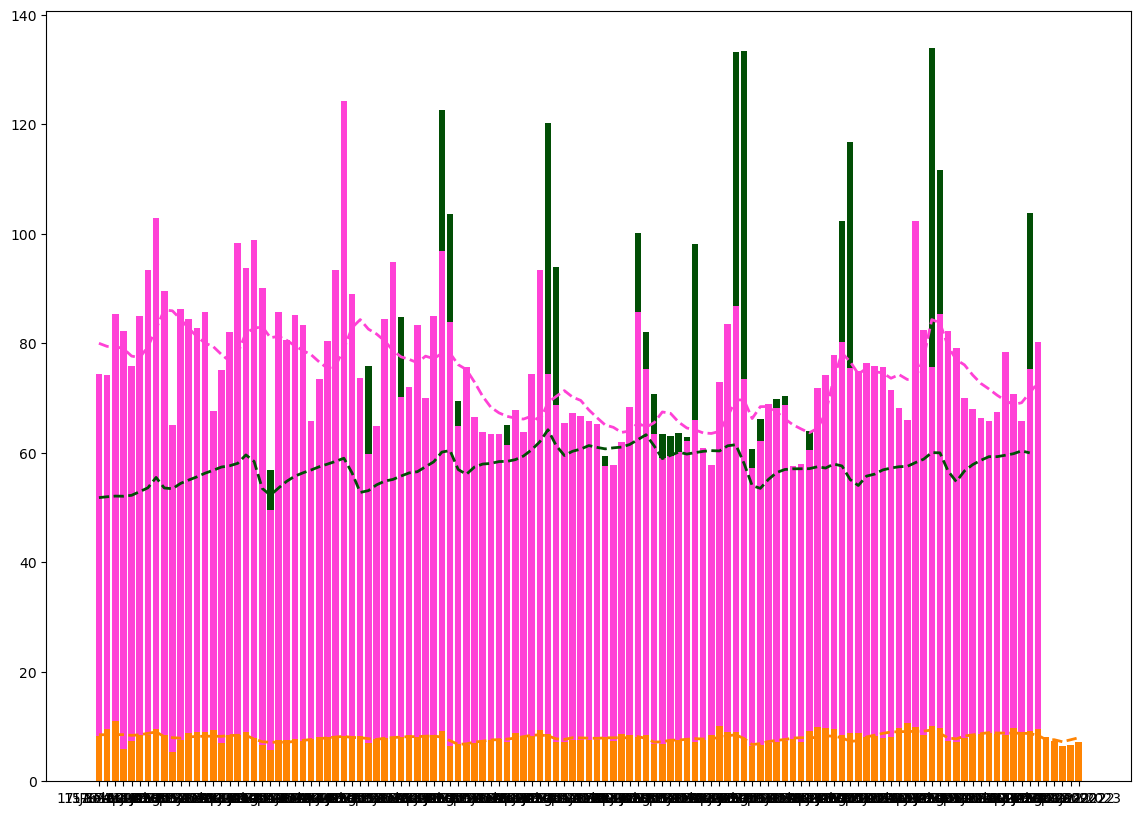

In [379]:
# fig,ax = plt.subplots(3,2,sharex='all', sharey='all',figsize=(14, 12))
plt.figure(figsize=(14,10))
total_dfs = {};
west_regions_name = ['NW','CW','SW']
for region in west_regions_name:
    if region == 'CE':
        color_code1 = '#B7FCFF'; # This is the light color
        color_code2  = '#00B1D8';x=1;y=1;
    elif region == 'SE':
        color_code1 = '#E7D6FA'; # This is the light color
        color_code2  = '#7900FF';x=2;y=1;
    elif region == 'SW':
        color_code1 = '#F9DBBB'; # This is the light color
        color_code2  = '#FF8403';x=2;y=0;
    elif region == 'CW':
        color_code1 = '#FFB8BF'; # This is the light color
        color_code2  = '#ff41d6';x=1;y=0;
    elif region == 'NW':
        color_code1 = '#A1FC77'; # This is the light color
        color_code2  = '#014E05'; x=0;y=0;
    else:
        color_code1 = '#848484'; # This is the light color
        color_code2  = '#848484';x=0;y=1;

    directory_path = root_path + 'Results/Output/Term_Ablation_Latest/'
    file_pattern = 'Term_Ablation_latest_updated_*' + region +'*.csv'  # Replace this with your desired file pattern
    
    # Use glob to find files matching the pattern in the directory
    matching_files = glob.glob(directory_path + file_pattern)
    csv_file = [];
    for file in matching_files:
        csv_file.append(pd.read_csv(file))
    
    term_ablation2 = [];
    discharge = [];
    date_axis = [];
    l = [];
    for i in range(len(csv_file)):
        l.append(len(csv_file[i]));
    len_max = np.min(l)
    min_idx = pd.Series(l).idxmin()
    #just to make the length of vectors equal   
    for date in csv_file[min_idx].dates:
        date_axis.append(date)

    term_ablation2_normalized = [];
    discharge2_normalized = [];
    for i in range(len(csv_file)):
        j = 0;
        term_ablation2_normalized.append([]) # Initialize an empty list for each index in term_ablation2
        discharge2_normalized.append([]);
        # mean_value = np.mean(csv_file[i].term_abl_year)
        # max_value = np.max(csv_file[i].term_abl_year-mean_value)
    
        # mean_value_dis = np.mean(csv_file[i].discharge)
        # max_value_dis = np.max(csv_file[i].discharge-mean_value_dis)
        for j in range(len_max):
        # range(len(csv_file[i].term_abl_year)):
            term_ablation2_normalized[i].append(csv_file[i].term_abl_year[j])
            discharge2_normalized[i].append(csv_file[i].discharge[j])
            # date_axis[i].append(csv_file[i].dates[j]);
            # date_axis[i] = csv_file[i].dates[j]
            j+=1;

    mean_term_abl_normalized = [];
    mean_discharge_normalized2 = [];
    for i in range(len(term_ablation2_normalized[0])):
        sum_term_abl = 0; discharge_sum = 0;
        for j in range(len(term_ablation2_normalized)):
            sum_term_abl = sum_term_abl + term_ablation2_normalized[j][i]
            discharge_sum = discharge_sum +  discharge2_normalized[j][i]

        mean_term_abl_normalized.append(sum_term_abl);
        mean_discharge_normalized2.append(discharge_sum);
        
    date_array = np.array(date_axis)
    mean_ta_array = np.array(mean_term_abl_normalized);discharge_array = np.array(mean_discharge_normalized2);
    total_df = pd.DataFrame({'date': date_array,'term_abl': mean_ta_array,'dis':discharge_array})
    total_dfs[region] = total_df;
    # plt.savefig(root_path + 'Results/Images/Regional_Figures/'+'Normalized_Time_series_for ' + region +'.png',dpi=300,bbox_inches='tight', pad_inches=0)
    # columns = {'date': date_array,'normalized_term_abl': mean_term_abl_normalized,'normalized_discharge':mean_discharge_normalized2}
    # mean_df = pd.DataFrame(data=columns)
    # mean_df.to_csv(root_path + 'Results/Output/Normalized_Terminus_Ablation/'+'Normalized_Time_series_for_' + region + '.csv')
    
    term_abl_color = color_code2
    discharge_color = '#ff0000ff'
    # mean_df['date'] = pd.to_datetime(mean_df['date'])

    plt.bar(total_df['date'],mean_term_abl_normalized, color = term_abl_color,linewidth = 2)
    plt.plot(total_df['date'],mean_discharge_normalized2, color = term_abl_color,linestyle = '--',linewidth = 2)
    # ax[x][y].set_xlim(np.datetime64('2013-01-01'), np.datetime64('2023-03-31'))
    # ax[x][y].set_ylim(-0.45,1)
    # ax[x][y].grid('on',color = '#E4E1E1')
    # plt.xlabel('Years',fontsize = 14)
    # plt.ylabel('Normalized flux',fontsize = 14)
    # plt.legend(['Normalized terminus ablation','Normalized discharge'],loc = 'best')
    # plt.tight_layout()
# plt.xlim(np.datetime64('2013-01-01'), np.datetime64('2023-03-31'))
plt.show()
    # plt.savefig(root_path + 'Results/Images/Regional_Figures/'+'Ice_flux_ ' + region +'.png',dpi=300)

In [149]:
mean_df['date'] = pd.to_datetime(mean_df['date'])

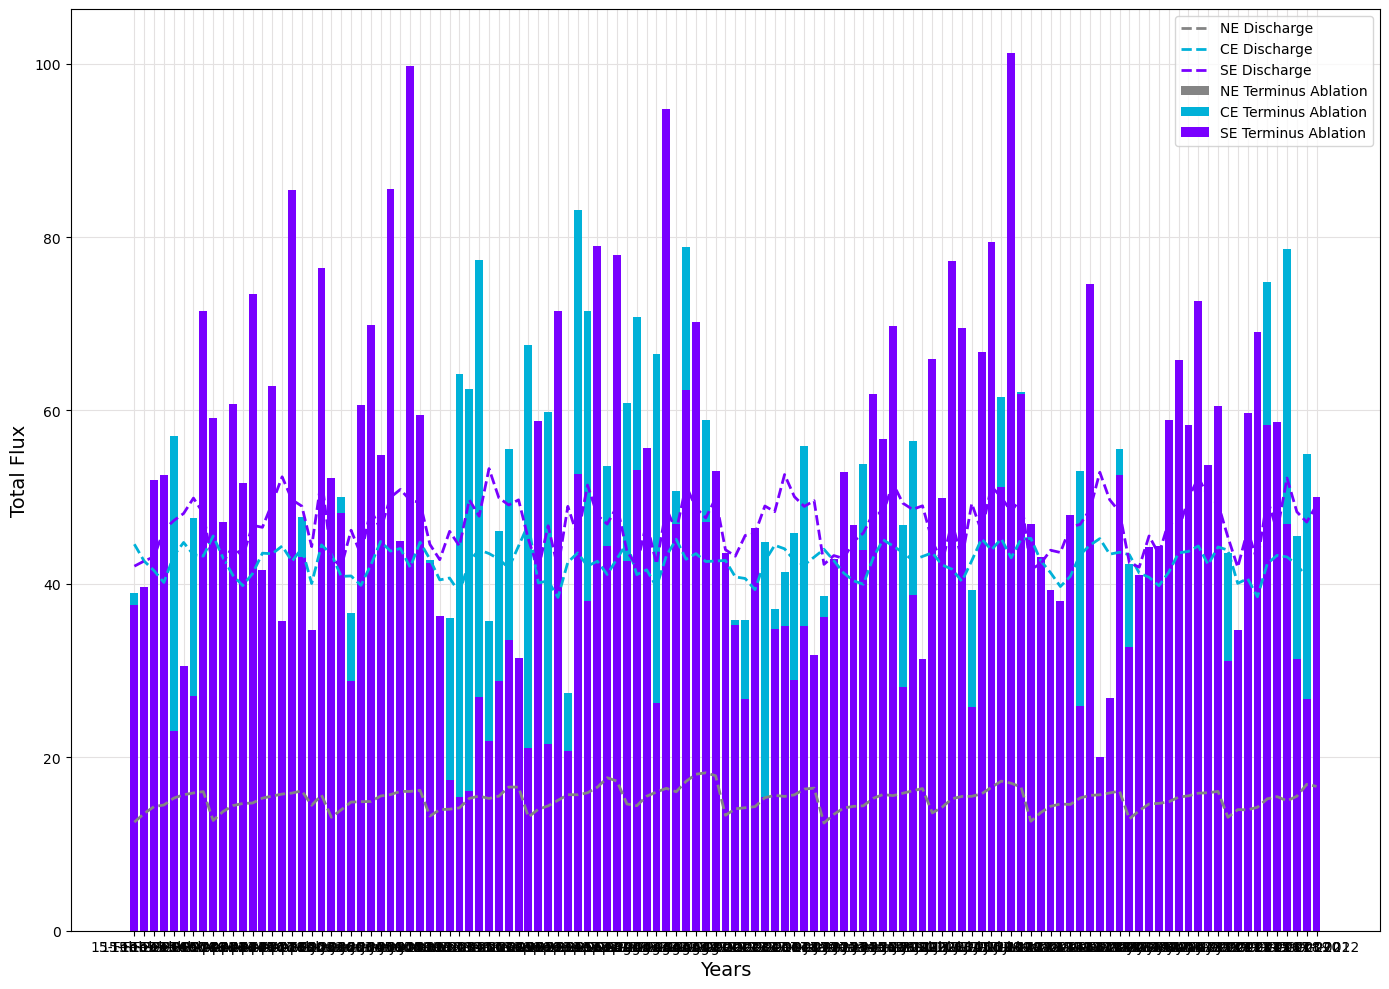

In [199]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

root_path = '/Users/amankc/Terminus_Ablation/'

plt.figure(figsize=(14, 10))

east_regions_name = ['NE', 'CE', 'SE']
for region in east_regions_name:
    if region == 'CE':
        color_code1 = '#B7FCFF'  # This is the light color
        color_code2 = '#00B1D8'
    elif region == 'SE':
        color_code1 = '#E7D6FA'  # This is the light color
        color_code2 = '#7900FF'
    elif region == 'SW':
        color_code1 = '#F9DBBB'  # This is the light color
        color_code2 = '#FF8403'
    elif region == 'CW':
        color_code1 = '#FFB8BF'  # This is the light color
        color_code2 = '#ff41d6'
    elif region == 'NW':
        color_code1 = '#A1FC77'  # This is the light color
        color_code2 = '#014E05'
    else:
        color_code1 = '#848484'  # This is the light color
        color_code2 = '#848484'

    directory_path = root_path + 'Results/Output/Term_Ablation_Latest/'
    file_pattern = 'Term_Ablation_latest_updated_*' + region + '*.csv'
    matching_files = glob.glob(directory_path + file_pattern)

    if not matching_files:
        print(f"No files found for region {region}")
        continue
    
    csv_files = [pd.read_csv(file) for file in matching_files]
    
    lengths = [len(csv_file) for csv_file in csv_files]
    len_max = np.min(lengths)
    min_idx = pd.Series(lengths).idxmin()
    # date_axis = pd.to_datetime(csv_files[min_idx].dates)

    term_ablation_total = []
    discharge_total = []
    
    for csv_file in csv_files:
        term_ablation_total.append(csv_file.term_abl_year[:len_max])
        discharge_total.append(csv_file.discharge[:len_max])
    
    total_term_abl = np.sum(term_ablation_total, axis=0)
    total_discharge = np.sum(discharge_total, axis=0)
    
    total_df = pd.DataFrame({
        'date': csv_files[min_idx].dates,
        'total_term_abl': total_term_abl,
        'total_discharge': total_discharge
    })

    # Ensure the DataFrame is sorted by date
    total_df.sort_values(by='date', inplace=True)

    term_abl_color = color_code2
    discharge_color = '#ff0000ff'
    
    # Plot bars and line
    plt.bar(total_df['date'], total_df['total_term_abl'], color=term_abl_color, zorder=2, label=f'{region} Terminus Ablation')
    plt.plot(total_df['date'], total_df['total_discharge'], color=term_abl_color, linestyle='--', linewidth=2, label=f'{region} Discharge', zorder=3)

plt.grid(True, color='#E4E1E1', zorder=1)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Total Flux', fontsize=14)
plt.legend(loc='best')
plt.tight_layout()

# output_path = root_path + 'Results/Images/Regional_Figures/Total_Time_series.png'
# plt.savefig(output_path, dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


In [340]:
total_df

,date,term_abl,dis
0,2013-01-17,36.232933,42.253651
1,2013-02-15,37.545579,42.045512
2,2013-03-17,46.875096,41.660234
3,2013-04-16,59.133514,41.787120
4,2013-05-17,32.720272,42.432682
...,...,...,...
116,2022-09-16,77.905914,48.961786
117,2022-10-17,49.994393,49.093802
118,2022-11-16,31.478831,49.693765
119,2022-12-17,31.810872,49.597383


In [234]:
leng_arr = [];
for region in regions_name:
  leng_arr.append(len(total_dfs[region]))
min_len = np.min(leng_arr)
min_len

115

<Axes: >

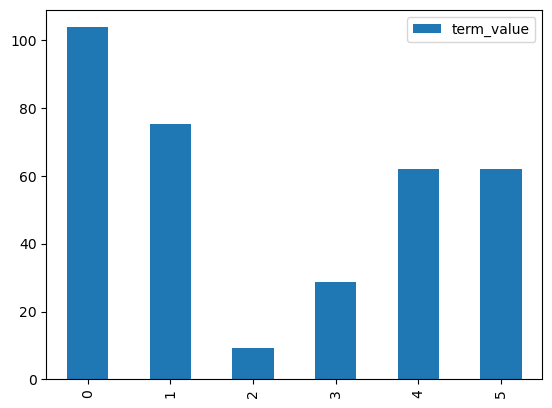

In [285]:
# for i in range(min_len):
term_values = [];region_name = [];
for region in regions_name:
    term_values.append(total_dfs[region]['term_abl'][i])
    region_name.append(region)

region_df = pd.DataFrame({'term_value': term_values, 'region': region_name})
region_df_sorted = region_df.sort_values(by='term_value')
region_df.plot(kind='bar', stacked=True)


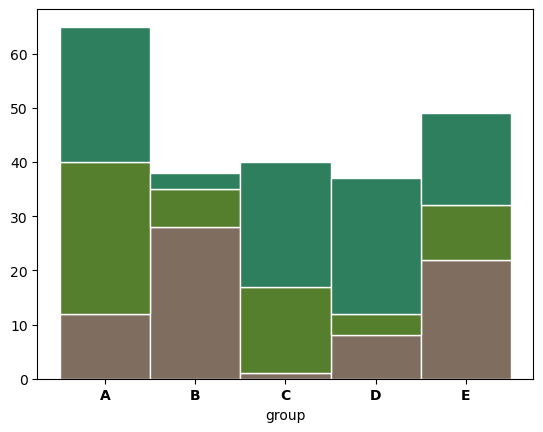

In [290]:
bars1 = [12, 28, 1, 8, 22]
bars2 = [28, 7, 16, 4, 10]
bars3 = [25, 3, 23, 25, 17]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['A','B','C','D','E']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the first ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
 
# Show graphic
plt.show()

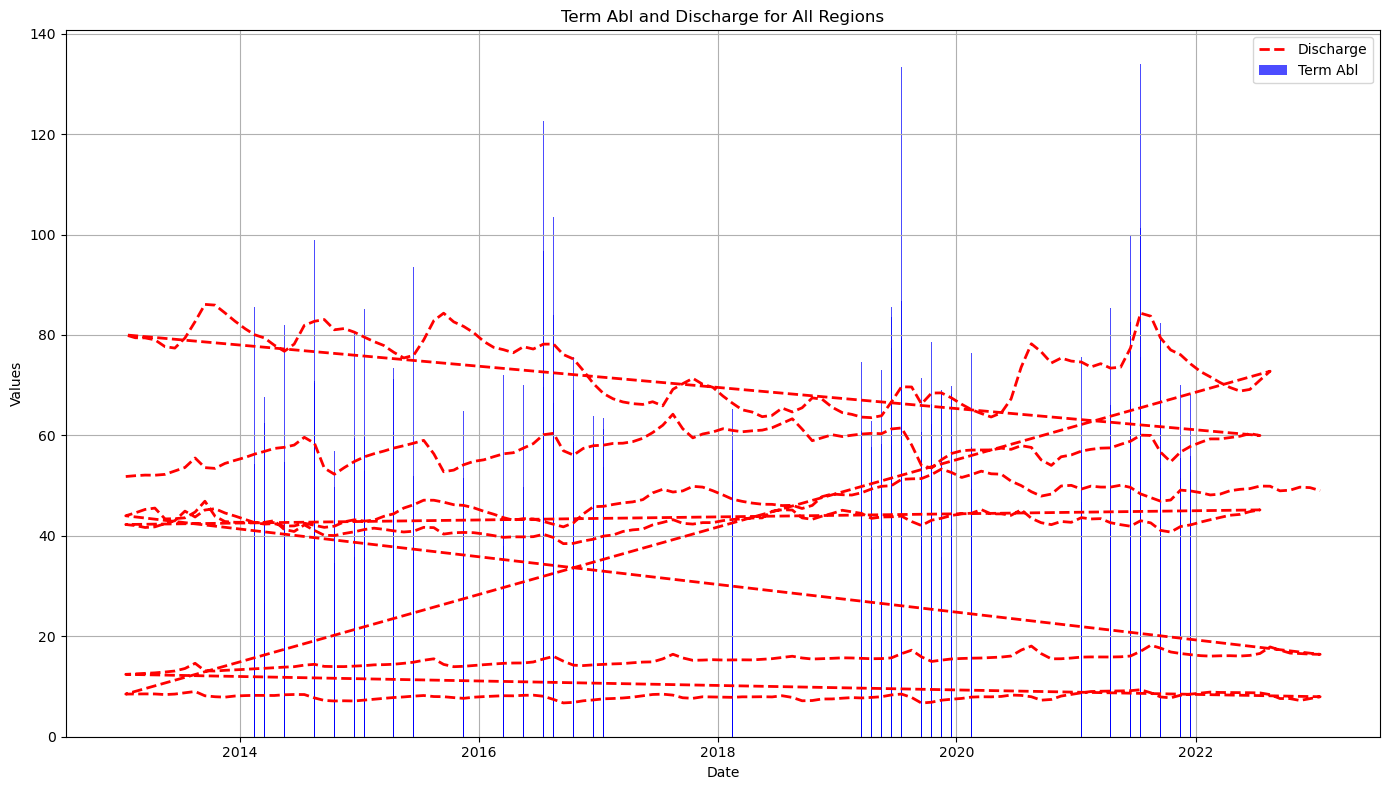

In [249]:
combined_df = pd.concat(total_dfs.values(), ignore_index=True)

# Convert date column to datetime format
combined_df['date'] = pd.to_datetime(combined_df['date'], format='%d-%b-%Y')

# Set up the plot
plt.figure(figsize=(14, 8))

# Plot term_abl as bars
plt.bar(combined_df['date'], combined_df['term_abl'], color='blue', alpha=0.7, label='Term Abl')

# Plot dis as dotted lines
plt.plot(combined_df['date'], combined_df['dis'], color='red', linestyle='--', linewidth=2, label='Discharge')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Term Abl and Discharge for All Regions')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [498]:
NW_dfs = total_dfs['NW']
CW_dfs = total_dfs['CW']
SW_dfs = total_dfs['SW']
NE_dfs = total_dfs['NE']
CE_dfs = total_dfs['CE']
SE_dfs = total_dfs['SE']

for region in total_dfs:
    total_dfs[region]['date'] = pd.to_datetime(total_dfs[region]['date'])
    total_dfs[region].set_index('date', inplace=True)

# Create a combined DataFrame with all dates
all_dates = pd.date_range(start='2013-01-17', end='2023-01-17', freq='MS')
combined_df = pd.DataFrame(index=all_dates)

# Merge each region's data into the combined DataFrame
for region in total_dfs:
    combined_df = combined_df.join(total_dfs[region]['term_abl'].rename(region), how='left')

# Fill NaN values with 0
combined_df = combined_df.fillna(0)

# Plotting the stacked bar chart
combined_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

plt.xlabel('Date')
plt.ylabel('Total Term Ablation Value')
plt.title('Total Term Ablation by Date')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

KeyError: 'date'

,data1,data2,data3
0,100,150,100
1,120,120,150
2,140,190,130


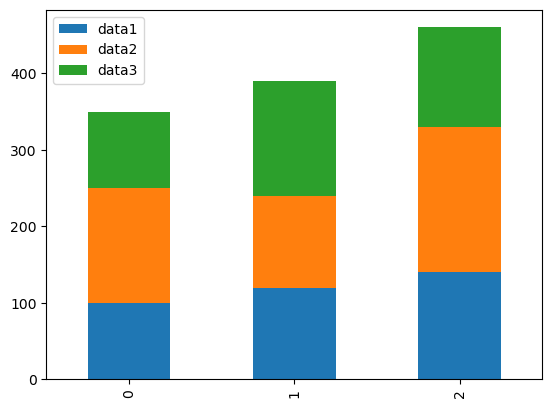

In [403]:
df=pd.DataFrame({'data1':data1, 'data2':data2, 'data3':data3})
df.plot(kind='bar', stacked=True)
df

<Figure size 1800x1000 with 0 Axes>

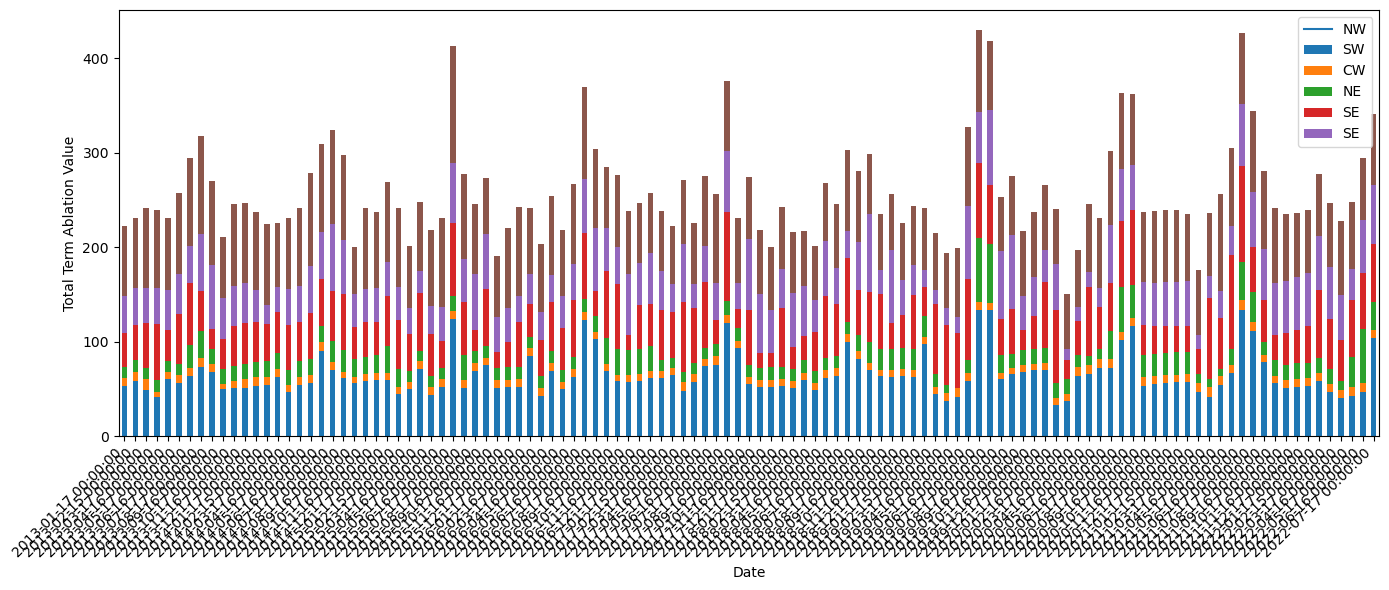

In [507]:
plt.figure(figsize=(18, 10))
result1 = pd.merge(NW_dfs, SW_dfs, on="date",suffixes=('_df1', '_df2'))
result1 = result1.drop(columns=['dis_df1', 'dis_df2'])
result2 = pd.merge(NE_dfs, SE_dfs, on="date",suffixes=('_df1', '_df2'))
result2 = result2.drop(columns=['dis_df1', 'dis_df2'])
result3 = pd.merge(CE_dfs, CW_dfs, on="date",suffixes=('_df1', '_df2'))
result3 = result3.drop(columns=['dis_df1', 'dis_df2'])
# First, merge result1 and result2 on the 'date' column
merged_df_1_2 = pd.merge(result1, result2, on='date')
# ),
#     'SE': ('#7900FF'),
#     'SW': ('#FF8403'),
#     'CW': ('#ff41d6'),
#     'NW': ('#014E05'),
#     'NE': ('#848484'
# Then, merge the resulting DataFrame with result3 on the 'date' column
final_merged_df = pd.merge(merged_df_1_2, result3, on='date')
# final_merged_df.plot(kind='bar', stacked=True,colors = ['#7900FF','#7900FF','#7900FF','#7900FF','#7900FF','#7900FF'],figsize = (14,6))
final_merged_df.plot(kind='bar', stacked=True,figsize = (14,6))
NW_dfs['dis'].plot()
# print(final_merged_df)
# plt.xlim(np.datetime64('2013-01-01'), np.datetime64('2023-03-31'))
plt.legend(['NW','SW','CW','NE','SE','SE'])
plt.xlabel('Date')
plt.ylabel('Total Term Ablation Value')
plt.xticks(rotation=45)
# plt.legend(title='Region')
plt.tight_layout()
plt.show()


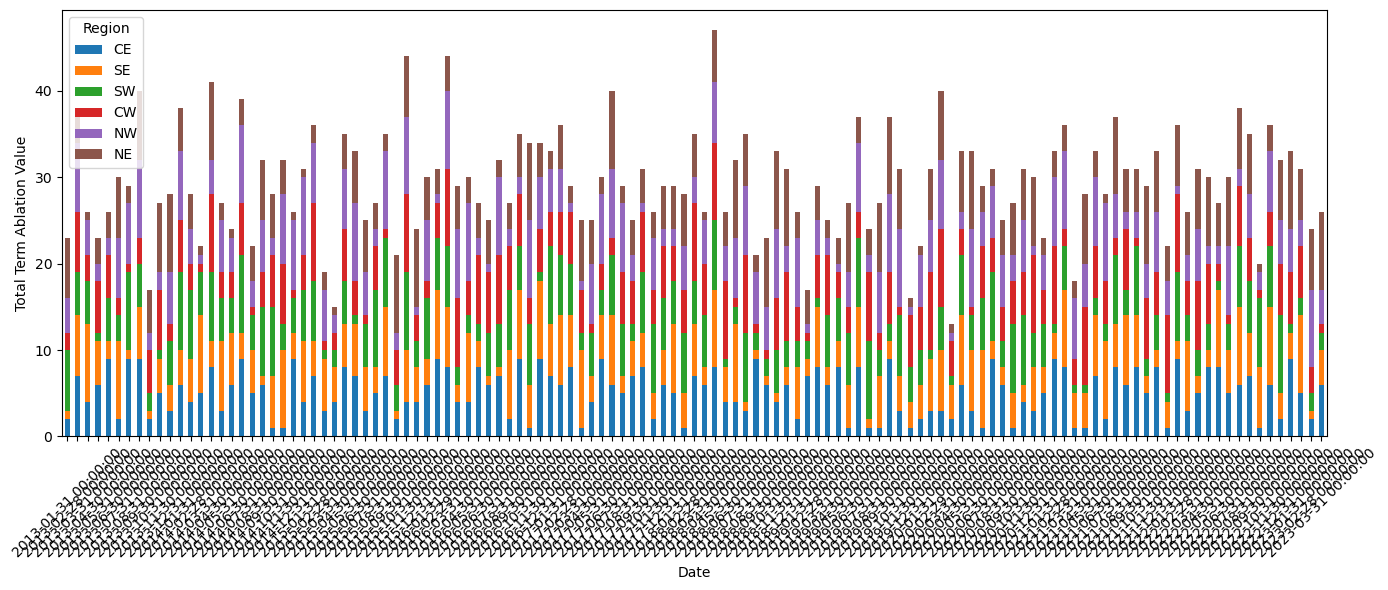

In [481]:
# Sample data
data = {
    'Date': pd.date_range(start='2013-01-01', end='2023-03-31', freq='M'),
    'CE': np.random.randint(1, 10, size=123),  # Example data for regions
    'SE': np.random.randint(1, 10, size=123),
    'SW': np.random.randint(1, 10, size=123),
    'CW': np.random.randint(1, 10, size=123),
    'NW': np.random.randint(1, 10, size=123),
    'NE': np.random.randint(1, 10, size=123)
}
final_merged_df = pd.DataFrame(data)
final_merged_df.set_index('Date', inplace=True)

# Color codes for regions
color_codes = {
    'CE': ('#00B1D8'),
    'SE': ('#7900FF'),
    'SW': ('#FF8403'),
    'CW': ('#ff41d6'),
    'NW': ('#014E05'),
    'NE': ('#848484')
}

# Plotting
ax = final_merged_df.plot(kind='bar', stacked=True, figsize=(14, 6))

# Customize plot
plt.xlabel('Date')
plt.ylabel('Total Term Ablation Value')
plt.xticks(rotation=45)
plt.legend(title='Region', labels=color_codes.keys())

# Apply colors from color_codes
# for region, (color1, color2) in color_codes.items():
#     ax.patches[0].set_facecolor(color1)  # Set color for first stack
#     ax.patches[1].set_facecolor(color2)  # Set color for second stack

plt.tight_layout()
plt.show()


In [516]:
# final_merged_df
# final_merged_df.insert(0, "D", 5)
final_merged_df.drop(columns=['D'])

,term_abl_df1_x,term_abl_df2_x,term_abl_df1_y,term_abl_df2_y,term_abl_df1,term_abl_df2
date,,,,,,
2013-01-17,53.128245,8.192182,12.344422,36.232933,38.622641,74.367430
2013-02-15,58.510928,9.480778,12.390710,37.545579,38.937074,74.264889
2013-03-17,49.437627,11.086443,12.132953,46.875096,37.008589,85.286996
2013-04-16,41.472770,5.834940,12.227410,59.133514,38.202057,82.228496
2013-05-17,60.449980,7.278011,12.396975,32.720272,42.275646,75.884884
...,...,...,...,...,...,...
2022-03-17,46.781481,8.578037,15.814055,52.600021,55.574120,67.434266
2022-04-16,41.076752,8.532331,9.363754,43.110666,47.696164,78.406231
2022-05-17,42.969139,9.735064,31.185299,60.477166,33.053594,70.698778


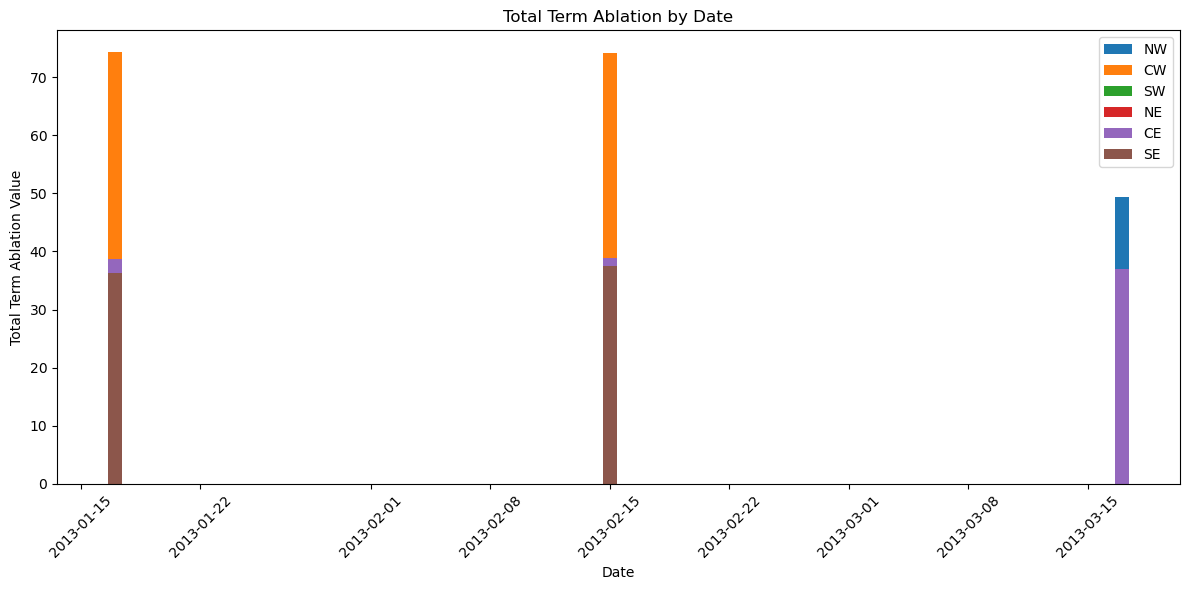

In [335]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)
total_dfs = {
    'NW': pd.DataFrame({'date': ['2013-01-17', '2013-02-15', '2013-03-17'],
                        'term_abl': [53.128245, 58.510928, 49.437627]}),
    'CW': pd.DataFrame({'date': ['2013-01-17', '2013-02-15'],
                        'term_abl': [74.367430, 74.264889]}),
    'SW': pd.DataFrame({'date': ['2013-01-17', '2013-02-15', '2013-03-17'],
                        'term_abl': [8.192182, 9.480778, 11.086443]}),
    'NE': pd.DataFrame({'date': ['2013-01-17', '2013-02-15', '2013-03-17'],
                        'term_abl': [12.344422, 12.390710, 12.132953]}),
    'CE': pd.DataFrame({'date': ['2013-01-17', '2013-02-15', '2013-03-17'],
                        'term_abl': [38.622641, 38.937074, 37.008589]}),
    'SE': pd.DataFrame({'date': ['2013-01-17', '2013-02-15'],
                        'term_abl': [36.232933, 37.545579]}),
}

# Convert date column to datetime format
for region, df in total_dfs.items():
    df['date'] = pd.to_datetime(df['date'])

# Combine all dataframes into one
combined_df = pd.concat(total_dfs.values(), ignore_index=True)

# Group by date and sum term_abl values for each region
grouped_df = combined_df.groupby('date')['term_abl'].sum().reset_index()

# Define colors for each region
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plotting the stacked bar chart
plt.figure(figsize=(12, 6))

for i, region in enumerate(total_dfs.keys()):
    # Merge region data with grouped_df on 'date'
    region_data = grouped_df.merge(total_dfs[region], on='date', how='left')
    
    # Plot bar chart for each region up to the length of the shortest dataframe
    plt.bar(region_data['date'], region_data['term_abl_y'].fillna(0), label=region, color=colors[i])

plt.xlabel('Date')
plt.ylabel('Total Term Ablation Value')
plt.title('Total Term Ablation by Date')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


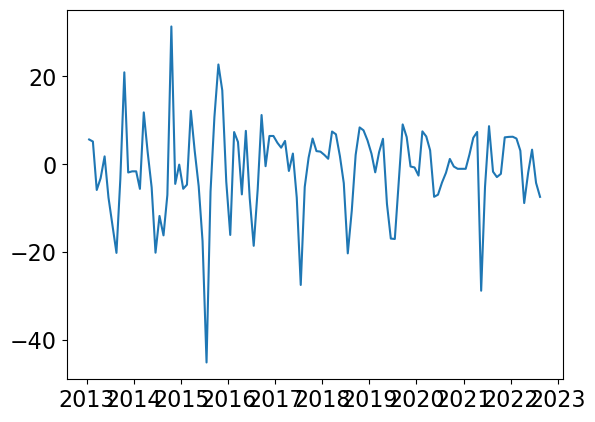

In [568]:
# https://python-charts.com/part-whole/stacked-bar-chart-matplotlib/#google_vignette
plt.plot(CW_dfs['dis']-CW_dfs['term_abl'])

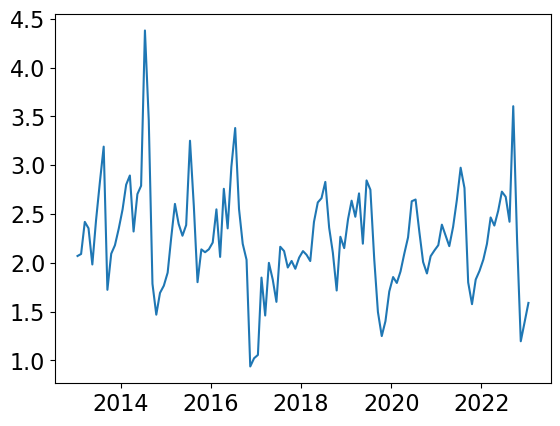

In [626]:
directory_path = root_path + 'Results/Output/Term_Ablation_Latest/'
# glacier_name = 'Nansen_Gletsjer'
file_pattern = 'Term_Ablation_latest_updated_' + '*.csv'  # Replace this with your desired file pattern

# Use glob to find files matching the pattern in the directory
matching_files = glob.glob(directory_path + file_pattern)
file = pd.read_csv(matching_files[0])
plt.plot(pd.to_datetime(file['dates']),file['term_abl_year'])

In [621]:
file['dates'] = pd.to_datetime(file['dates'])
file.set_index('dates', inplace=True)
yearly_mean_df  = file.resample('Y').mean()

<Axes: xlabel='dates'>

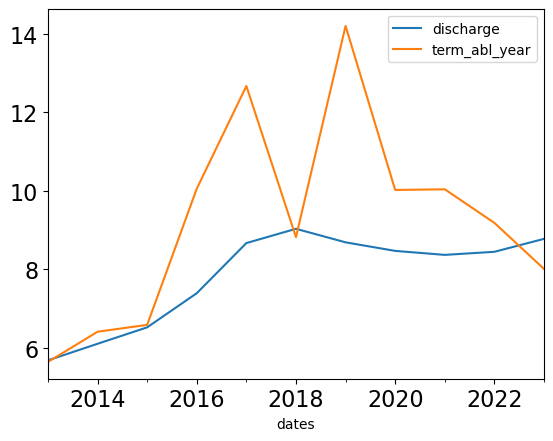

In [622]:
yearly_mean_df.plot()

In [623]:
yearly_mean_df.mean()

discharge        7.833877
term_abl_year    9.242215
dtype: float64

In [603]:
2.12-1/1 (yearly average is more than 20% from the  of the decadal on multiyear 

1.12

In [ ]:
TA_updated_Issuusarsuit_SermiatNW.png
TA_updated_Nansen_GletsjerNW.png
TA_updated_Ullip_SermiaNW.png
TA_updated_SermersuaqNW.png

In [625]:
file_pattern

'Term_Ablation_latest_updated_**.csv'

In [664]:
directory_path = root_path + 'Results/Output/Term_Ablation_Latest/'
# glacier_name = 'Nansen_Gletsjer'
file_pattern = 'Term_Ablation_latest_updated_*.csv'  # Replace this with your desired file pattern

# Use glob to find files matching the pattern in the directory
matching_files = glob.glob(directory_path + file_pattern)
dis = []; ta = [];
for i in range(len(matching_files)):
    file = pd.read_csv(matching_files[i])
    dis.append((file['discharge']/12).sum())
    ta.append((file['term_abl_year']/12).sum())
# file = pd.read_csv(matching_files[0])
# plt.plot(pd.to_datetime(file['dates']),file['term_abl_year'])

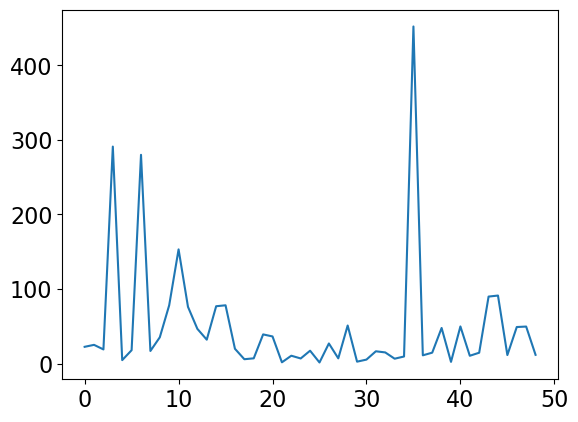

In [666]:
plt.plot(dis)

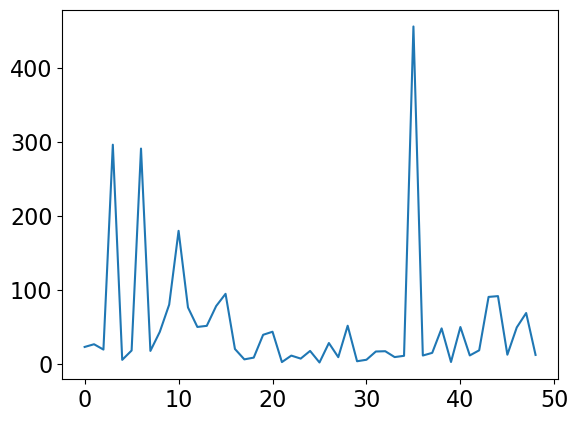

In [669]:
plt.plot(ta)

In [668]:
np.sum(ta)-np.sum(dis)

136.87732430886854

In [672]:
np.sum(ta)/10



257.9926747578938

In [674]:
136.87732430886854/10

13.687732430886854